# Env Setting and Data Inspection

In [ ]:
!curl -fsSL https://ollama.com/install.sh | sh


In [1]:
# To support background processes in Kaggle
import os
get_ipython().system = os.system

In [2]:
!ollama serve &


0

2024/07/09 00:08:38 routes.go:1064: INFO server config env="map[CUDA_VISIBLE_DEVICES: GPU_DEVICE_ORDINAL: HIP_VISIBLE_DEVICES: HSA_OVERRIDE_GFX_VERSION: OLLAMA_DEBUG:false OLLAMA_FLASH_ATTENTION:false OLLAMA_HOST:http://127.0.0.1:11434 OLLAMA_INTEL_GPU:false OLLAMA_KEEP_ALIVE: OLLAMA_LLM_LIBRARY: OLLAMA_MAX_LOADED_MODELS:1 OLLAMA_MAX_QUEUE:512 OLLAMA_MAX_VRAM:0 OLLAMA_MODELS:/root/.ollama/models OLLAMA_NOHISTORY:false OLLAMA_NOPRUNE:false OLLAMA_NUM_PARALLEL:1 OLLAMA_ORIGINS:[http://localhost https://localhost http://localhost:* https://localhost:* http://127.0.0.1 https://127.0.0.1 http://127.0.0.1:* https://127.0.0.1:* http://0.0.0.0 https://0.0.0.0 http://0.0.0.0:* https://0.0.0.0:* app://* file://* tauri://*] OLLAMA_RUNNERS_DIR: OLLAMA_SCHED_SPREAD:false OLLAMA_TMPDIR: ROCR_VISIBLE_DEVICES:]"
time=2024-07-09T00:08:38.991Z level=INFO source=images.go:730 msg="total blobs: 10"
time=2024-07-09T00:08:38.991Z level=INFO source=images.go:737 msg="total unused blobs removed: 0"
time=2024-

In [ ]:


!pip install ollama

!pip install pandas sentence-transformers elasticsearch  transformers torch faiss-gpu

!pip install -U langchain-nomic langchain_community tiktoken langchainhub chromadb langchain langgraph tavily-python nomic[local] langchain-text-splitters   langchain-openai chromadb langchain cohere langchain-milvus rank_bm25 langchain_cohere


!pip install rank_llm

In [70]:
!ollama pull llama3



[GIN] 2024/07/09 - 00:27:36 | 200 |      82.574µs |       127.0.0.1 | HEAD     "/"


pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ 

[GIN] 2024/07/09 - 00:27:36 | 200 |  537.092277ms |       127.0.0.1 | POST     "/api/pull"


pulling manifest ⠸ pulling manifest ⠼ pulling manifest 
pulling 6a0746a1ec1a... 100% ▕████████████████▏ 4.7 GB                         
pulling 4fa551d4f938... 100% ▕████████████████▏  12 KB                         
pulling 8ab4849b038c... 100% ▕████████████████▏  254 B                         
pulling 577073ffcc6c... 100% ▕████████████████▏  110 B                         
pulling 3f8eb4da87fa... 100% ▕████████████████▏  485 B                         
verifying sha256 digest 
writing manifest 
removing any unused layers 
success 


0

In [ ]:
!ollama pull gemma2

In [ ]:
!pip install gdown

In [ ]:
!gdown https://drive.google.com/uc?id=1-8p5GHC8eZCJUU54Zwg-iUW8FasGtatr

In [ ]:
!gdown https://drive.google.com/uc?id=1B77OmwBgmsMKc44ZIVt0dEpO_x9IUo95

In [ ]:
%pip install pymilvus

%pip install langchain-huggingface

%pip install --upgrade --quiet  llmlingua accelerate

%pip install  milvus



In [ ]:
%pip install ragas==0.1.0

# LangChain
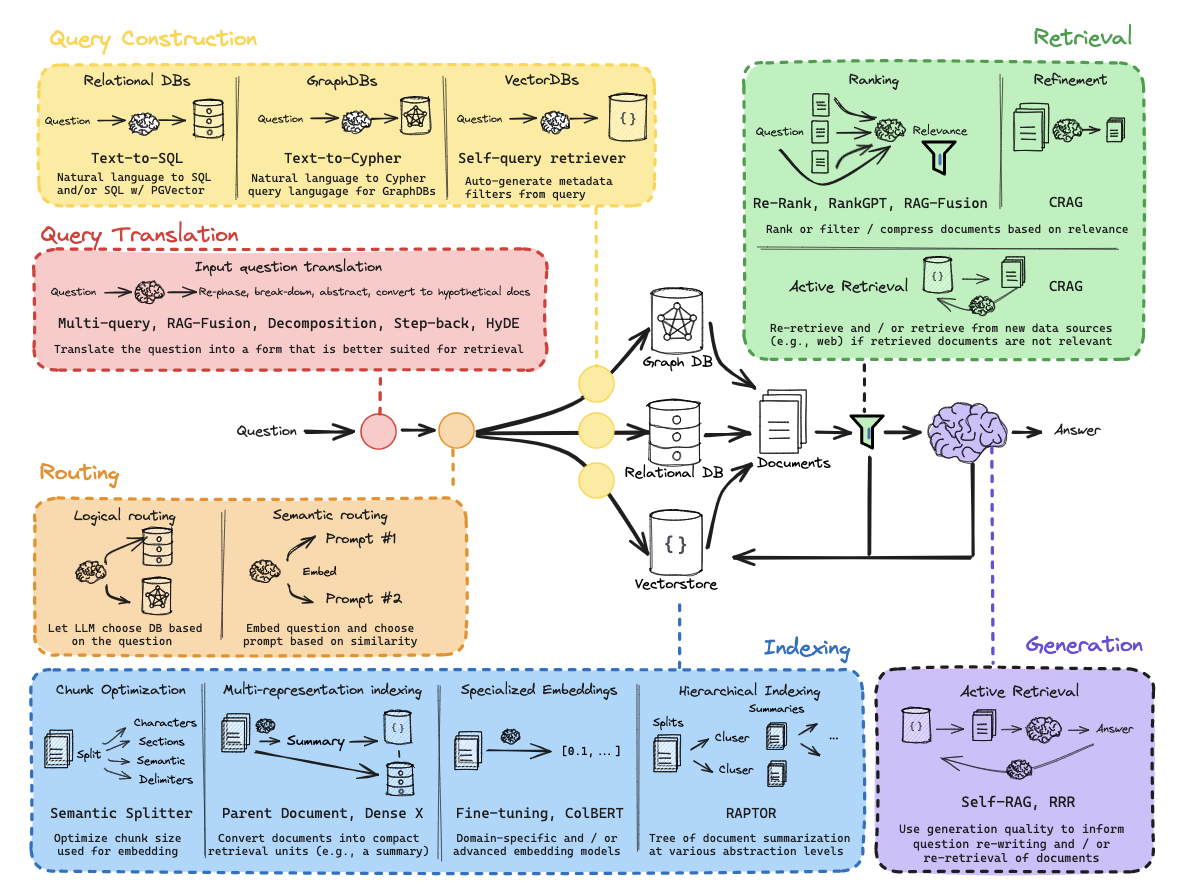

In [3]:
#
import os

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_API_KEY"] = "<your-api-key>"

## Indexing , Reterival & ReRanking
### Indexing

#### LLM-Embedder
[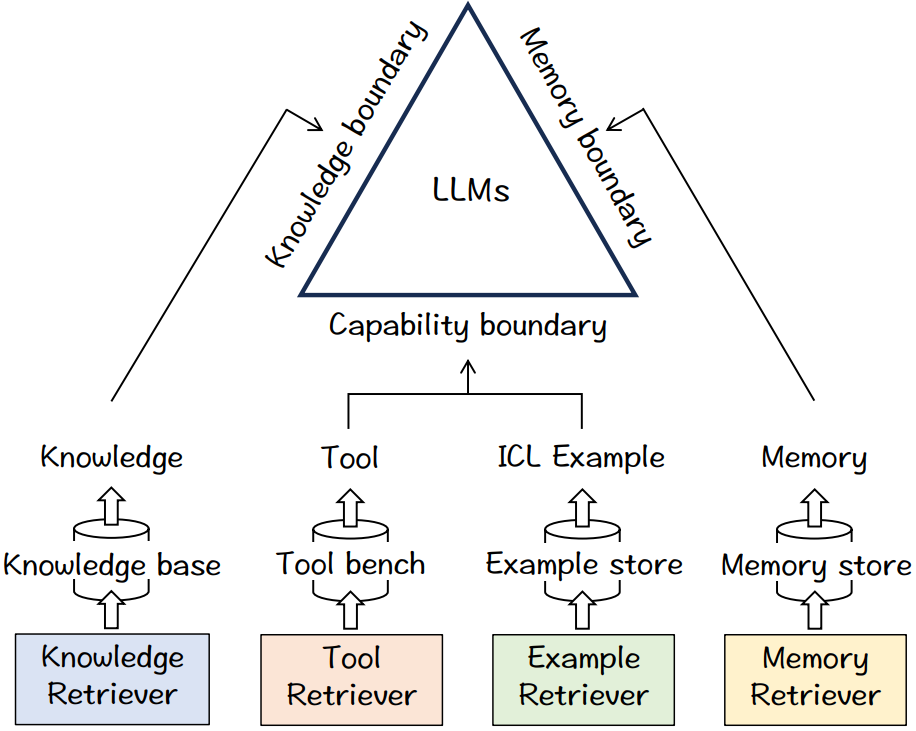](https://arxiv.org/abs/2310.07554)

In [4]:
from langchain_community.document_loaders import CSVLoader
from langchain_community.vectorstores import Chroma
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_huggingface.embeddings import HuggingFaceEmbeddings

model_name = "BAAI/llm-embedder"
embd = HuggingFaceEmbeddings(
    model_name=model_name,
)




/opt/conda/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
2024-07-09 00:08:59.632077: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-09 00:08:59.632140: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-09 00:08:59.633719: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132:

In [5]:
docs = CSVLoader("sampled_jobs.csv").load()


In [6]:
from langchain_community.chat_models import ChatOllama
#embd = NomicEmbeddings(model="nomic-embed-text-v1.5", inference_mode="local",device='cuda')
model = ChatOllama(model='gemma2', temperature=0)

In [7]:

text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=2000, chunk_overlap=0
)
doc_splits = text_splitter.split_documents(docs)



### **Milvus**
[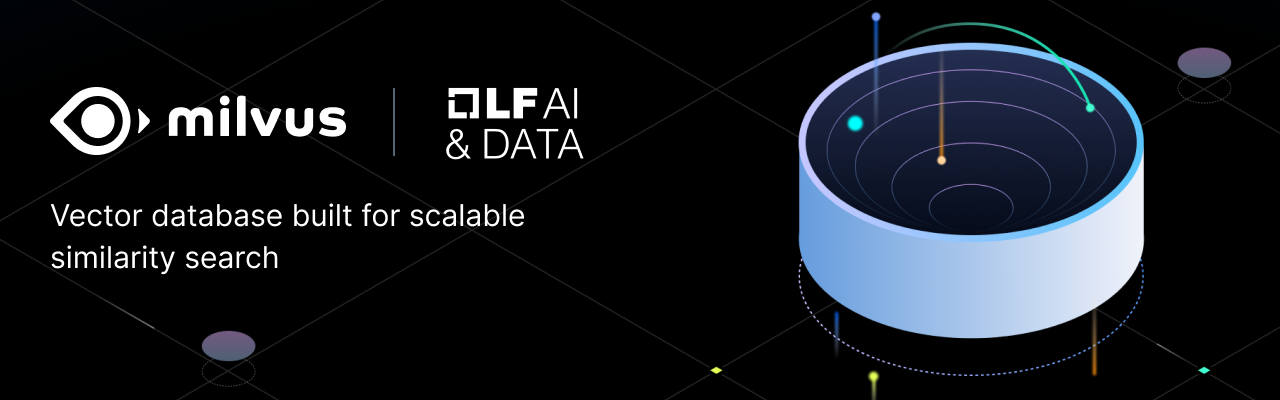](https://github.com/milvus-io/milvus)

### if you did not create Milvus DB for the Sampled_jobs.csv run this

In [ ]:
# @title if you did not create Milvus DB for the Sampled_jobs.csv run this
# takes 30+ mins
from langchain_milvus import Milvus, Zilliz
vectorstore = Milvus.from_documents(  # or Zilliz.from_documents
    documents=doc_splits,
    embedding=embd,

    connection_args={
        "uri": "./milvus_demo.db",
    },
    drop_old=True,  # Drop the old Milvus collection if it exists

)


### if already created then run this cell

In [8]:

# @title if already created then run this cell
from milvus import default_server
default_server.start()

In [9]:
from langchain_milvus import Milvus, Zilliz

vectorstore = Milvus(
    embd,
    connection_args={"uri": "SampleJobs_DB.db"},
)

In [27]:
Milvus_retriever = vectorstore.as_retriever(search_kwargs={"k": 1})

In [28]:
Milvus_retriever.invoke("Machine Learning Engineer")

[Document(metadata={'source': '/content/sampled_jobs.csv', 'row': 1279, 'pk': 450992307897370874}, page_content="job_title: Machine Learning Engineer\ndescription: A little bit about us!At Snoonu, we hold the belief that technology has the power to make anything possible.Our Vision: to be the first Qatari Super App that propels the region and its community through innovation and technology. We envision a global expansion where what we do surpasses norms and limitations every time.Our Mission: To radically transform how people live by leveraging technology to connect them with endless possibilities.Values We Live ByBe Customer Obsessed - “Focus on the customer and all else will follow.”Act with Integrity - “We are honest, ethical, and trustworthy in everything we do.”Be Curious and Creative - “We constantly innovate and create solutions to bring a lasting positive impact.”Lead by Example and Take Ownership - “Be the change you want to see and take ownership.”Hustle and Deliver Results -

In [29]:


def pretty_print_docs(docs):
    print(
        f"\n{'-' * 100}\n".join(
            [f"Document {i+1}:\n\n" + d.page_content for i, d in enumerate(docs)]
        )
    )



### **HyDE**
[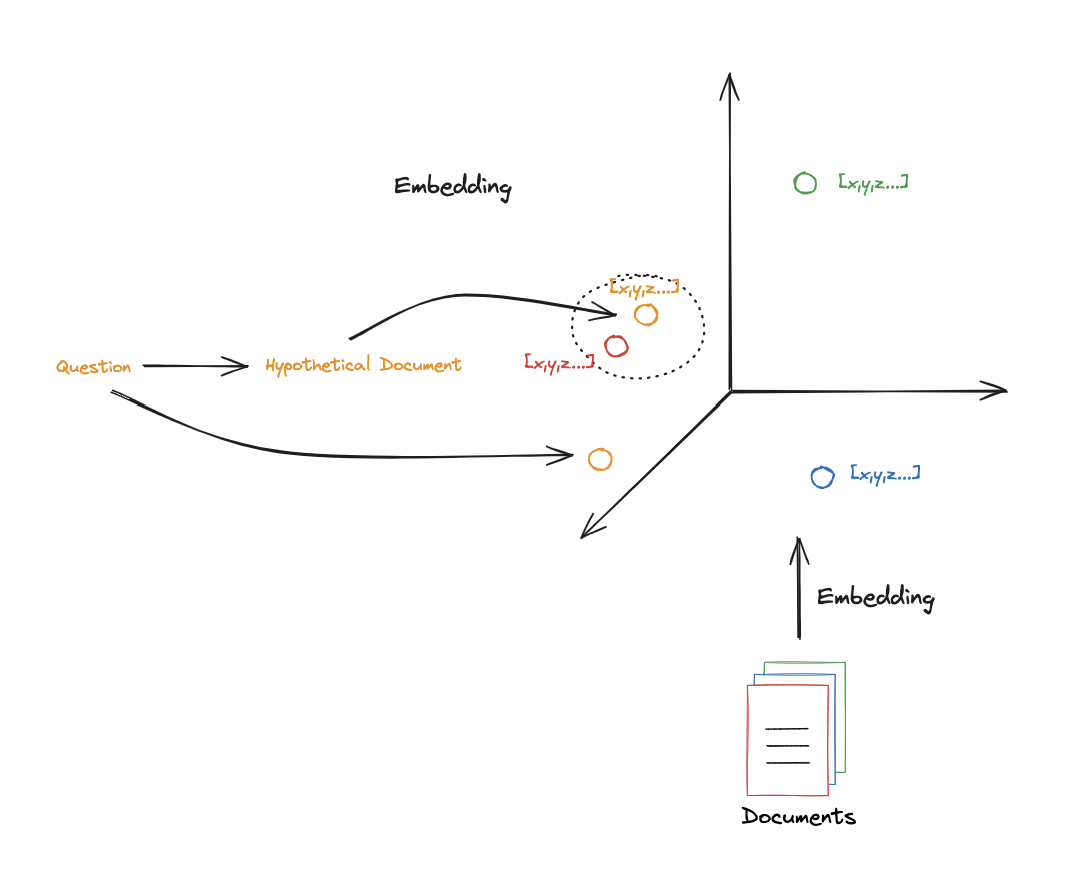](https://arxiv.org/abs/2212.10496)



In [30]:
from langchain.prompts import ChatPromptTemplate

# HyDE document genration
template = """Please write a scientific paper passage to answer the question
Question: what are the requirements needed to become a good {question}?
Passage:"""
prompt_hyde = ChatPromptTemplate.from_template(template)

from langchain_core.output_parsers import StrOutputParser

generate_docs_for_retrieval = (
    prompt_hyde | model | StrOutputParser()
)

# Run
question = "Network Engineer"
generate_docs_for_retrieval.invoke({"question":question})

WARN [launch_slot_with_data] Max tokens to predict exceeds server configuration | params.n_predict=40960 slot.n_predict=4058 tid="132232653275136" timestamp=1720483930
INFO [update_slots] model does not support sliding window, limiting generation | n_ctx=4096 n_predict=4058 n_prompt_tokens=38 tid="132232653275136" timestamp=1720483930
[GIN] 2024/07/09 - 00:12:23 | 200 | 13.320829809s |       127.0.0.1 | POST     "/api/chat"


'##  Cultivating Proficiency in Network Engineering: A Multifaceted Approach\n\nThe field of Network Engineering demands a unique blend of technical expertise, problem-solving acumen, and interpersonal skills. Aspiring network engineers must cultivate a multifaceted skillset to thrive in this dynamic and ever-evolving domain. \n\n**Technical Proficiency:**\n\nA strong foundation in fundamental networking concepts is paramount. This encompasses understanding network topologies, protocols (TCP/IP, DNS, DHCP), routing algorithms, and switching technologies. Proficiency in network security principles, including firewalls, intrusion detection systems, and encryption protocols, is also crucial.  \n\n**Hands-on Experience:**\n\nTheoretical knowledge must be complemented by practical experience. Engaging in hands-on projects, configuring and troubleshooting network devices, and participating in network simulations are essential for developing practical skills. Exposure to diverse network envir

In [31]:
# Retrieve
HyDE_retrieval_chain = generate_docs_for_retrieval | Milvus_retriever
retireved_docs = HyDE_retrieval_chain.invoke({"question":question})
pretty_print_docs(retireved_docs)

WARN [launch_slot_with_data] Max tokens to predict exceeds server configuration | params.n_predict=40960 slot.n_predict=4058 tid="132232653275136" timestamp=1720483943
INFO [update_slots] model does not support sliding window, limiting generation | n_ctx=4096 n_predict=4058 n_prompt_tokens=38 tid="132232653275136" timestamp=1720483943
[GIN] 2024/07/09 - 00:12:37 | 200 | 13.738841151s |       127.0.0.1 | POST     "/api/chat"
Document 1:

job_title: Entry-Level Network Engineer (CCNA/CCNP + Firewall)
description: Welcome to Network Consultancy Services (NCS), an esteemed Information Technology System Integrator established in 2009. With a focus on excellence and innovation, we specialize in providing comprehensive IT solutions to corporates and small and medium businesses. Our expertise spans across IT product sales, service, maintenance, and designing custom solutions tailored to meet your unique requirements. As a trusted partner, we offer a wide range of services, including IT enginee

### **Hybrid Search**
**BM25** is a sophisticated ranking function used in information retrieval. Acting like a highly efficient librarian, it excels in navigating through extensive collections of documents. Its effectiveness lies in term Frequency: Evaluating how often search terms appear in each document. Document Length Normalization: Ensuring a fair chance for both short and long documents in search results. Bias-Free Information Retrieval: Ideal for large data sets where unbiased results are critical.


**BM25 Retriever** - Sparse retriever

**Embeddings** - Dense retrievers Milvus

`Hybrid search = Sparse + Dense retriever`

In [32]:

from langchain.retrievers import BM25Retriever, EnsembleRetriever
from langchain.schema import Document


# Initialize the BM25 retriever
bm25_retriever = BM25Retriever.from_documents(doc_splits)
bm25_retriever.k = 1  # Retrieve top 2 results

print("type of bm25", type(bm25_retriever))



type of bm25 <class 'langchain_community.retrievers.bm25.BM25Retriever'>


In [33]:
# Initialize the ensemble retriever
ensemble_retriever = EnsembleRetriever(
    retrievers=[bm25_retriever, Milvus_retriever], weights=[0.2, 0.8]
)



In [34]:
# Example customer query
question = "Senior Machine Learning Engineer"


# Retrieve relevant documents/products
docs = ensemble_retriever.get_relevant_documents(question)

# Extract and print only the page content from each document
pretty_print_docs(docs)



Document 1:

job_title: Senior Machine Learning Engineer
description: Siemens Digital Industries (DI) is an innovation leader in automation and digitalization. Closely, collaborating with partners and customers, we care about the digital transformation in the process and discrete industries. With our Digital Enterprise portfolio, we provide and encourage companies of all sizes with an end-to-end set of products, solutions and services to integrate and digitalize the entire value chain. Meaningful optimization for the specific needs of each industry, our outstanding portfolio supports customers to achieve greater efficiency and flexibility. We are constantly adding innovations to its portfolio to integrate groundbreaking future technologies. We have our global headquarters in Nuremberg, Germany, and have around 75,000 employees internationally.Are you passionate about advancing machine learning and software engineering? Join our Calibre SONR team in Cairo, Egypt, as a Senior Software En

### **ReRanking**
[Cohere Reranker](https://cohere.com/rerank)


In [35]:
cohere_api_key = "<Your_API_Key>"

In [36]:
from langchain.retrievers.contextual_compression import ContextualCompressionRetriever
from langchain_cohere import CohereRerank
from langchain_community.llms import Cohere



compressor = CohereRerank(cohere_api_key=cohere_api_key)
compression_retriever = ContextualCompressionRetriever(
    base_compressor=compressor, base_retriever=ensemble_retriever
)

compressed_docs = compression_retriever.invoke(
    question
)
pretty_print_docs(compressed_docs)

Document 1:

job_title: Senior Machine Learning Engineer
description: Siemens Digital Industries (DI) is an innovation leader in automation and digitalization. Closely, collaborating with partners and customers, we care about the digital transformation in the process and discrete industries. With our Digital Enterprise portfolio, we provide and encourage companies of all sizes with an end-to-end set of products, solutions and services to integrate and digitalize the entire value chain. Meaningful optimization for the specific needs of each industry, our outstanding portfolio supports customers to achieve greater efficiency and flexibility. We are constantly adding innovations to its portfolio to integrate groundbreaking future technologies. We have our global headquarters in Nuremberg, Germany, and have around 75,000 employees internationally.Are you passionate about advancing machine learning and software engineering? Join our Calibre SONR team in Cairo, Egypt, as a Senior Software En

### **Summarization**
Retrieval results may contain redundant or unnecessary information, potentially preventing LLMs
from generating accurate responses. Additionally, long prompts can slow down the inference process.
Therefore, efficient methods to summarize retrieved documents are crucial in the RAG pipeline.
Summarization tasks can be extractive or abstractive. Extractive methods segment text into sentences, then score and rank them based on importance. Abstractive compressors synthesize information from multiple documents to rephrase and generate a cohesive summary. These tasks can be
query-based or non-query-based. In this paper, as RAG retrieves information relevant to queries, we
focus exclusively on query-based methods.<br>
[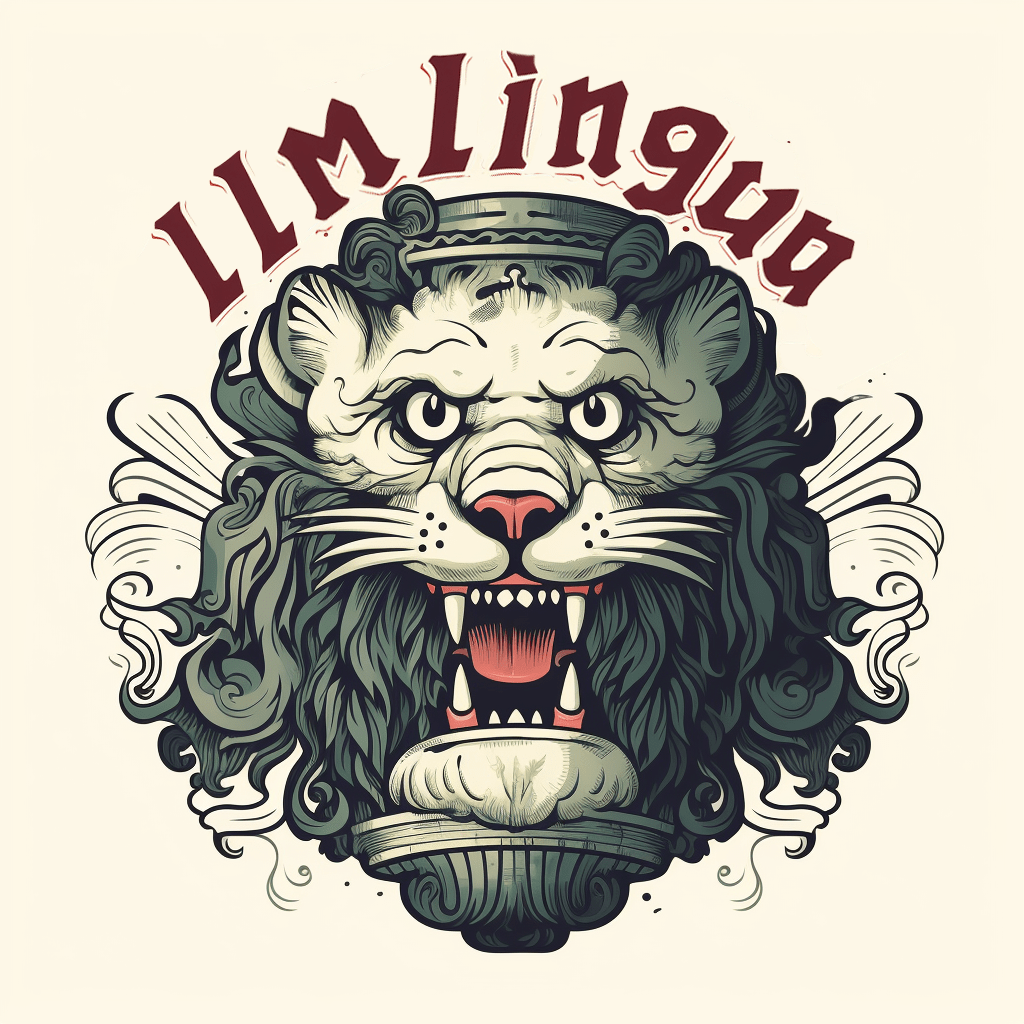](https://llmlingua.com/)

In [ ]:
from llmlingua import PromptCompressor

llm_lingua = PromptCompressor(
    model_name="microsoft/llmlingua-2-xlm-roberta-large-meetingbank",
    use_llmlingua2=True,
)

In [ ]:
docs_txt = []
for doc in compressed_docs:
    docs_txt.append(doc.page_content)
docs_txt = '\n\n'.join(docs_txt)

In [ ]:
# 2000 Compression
compressed_prompt = llm_lingua.compress_prompt(
    docs_txt,
    rate=0.33,
    force_tokens=["!", ".", "?", "\n"],
    drop_consecutive=True,
)

In [ ]:
compressed_prompt

## Generation

### using Ollama Gemma2 9b

In [ ]:
model = ChatOllama(model='gemma2', temperature=0)

question = "Senior Cloud Engineer"

# RAG
template = """
    please provide the user with a personalized career advice to become {question}
    based on these retrieved documents job postings:
    {context}
    sound natural and generic do not include any of job poster details just utilize the context of what is needed
    DO NOT start with refering that you were looking into job poster rather than a domain expert
"""
retireved_docs=compression_retriever.invoke(question)
prompt = ChatPromptTemplate.from_template(template)

final_rag_chain = (
    prompt
    | model
    | StrOutputParser()
)





In [ ]:
print(final_rag_chain.invoke({"context":retireved_docs,"question":question}))

In [ ]:
pretty_print_docs(retireved_docs)

### using Olama LLama3 Model

In [ ]:
model = ChatOllama(model='llama3', temperature=0)

# RAG
template = """
    please provide the user with a personalized career advice to become {question}
    based on these retrieved documents job postings:
    {context}
    sound natural and generic do not include any of job poster details just utilize the context of what is needed
    DO NOT start with refering that you were looking into job poster rather than a domain expert
"""
retireved_docs=compression_retriever.invoke(question)

prompt = ChatPromptTemplate.from_template(template)

final_rag_chain = (
    prompt
    | model
    | StrOutputParser()
)



In [ ]:
print(final_rag_chain.invoke({"context":retireved_docs,"question":question}))



In [ ]:
pretty_print_docs(retireved_docs)

# **RAG Evaluation using RAGAS**
[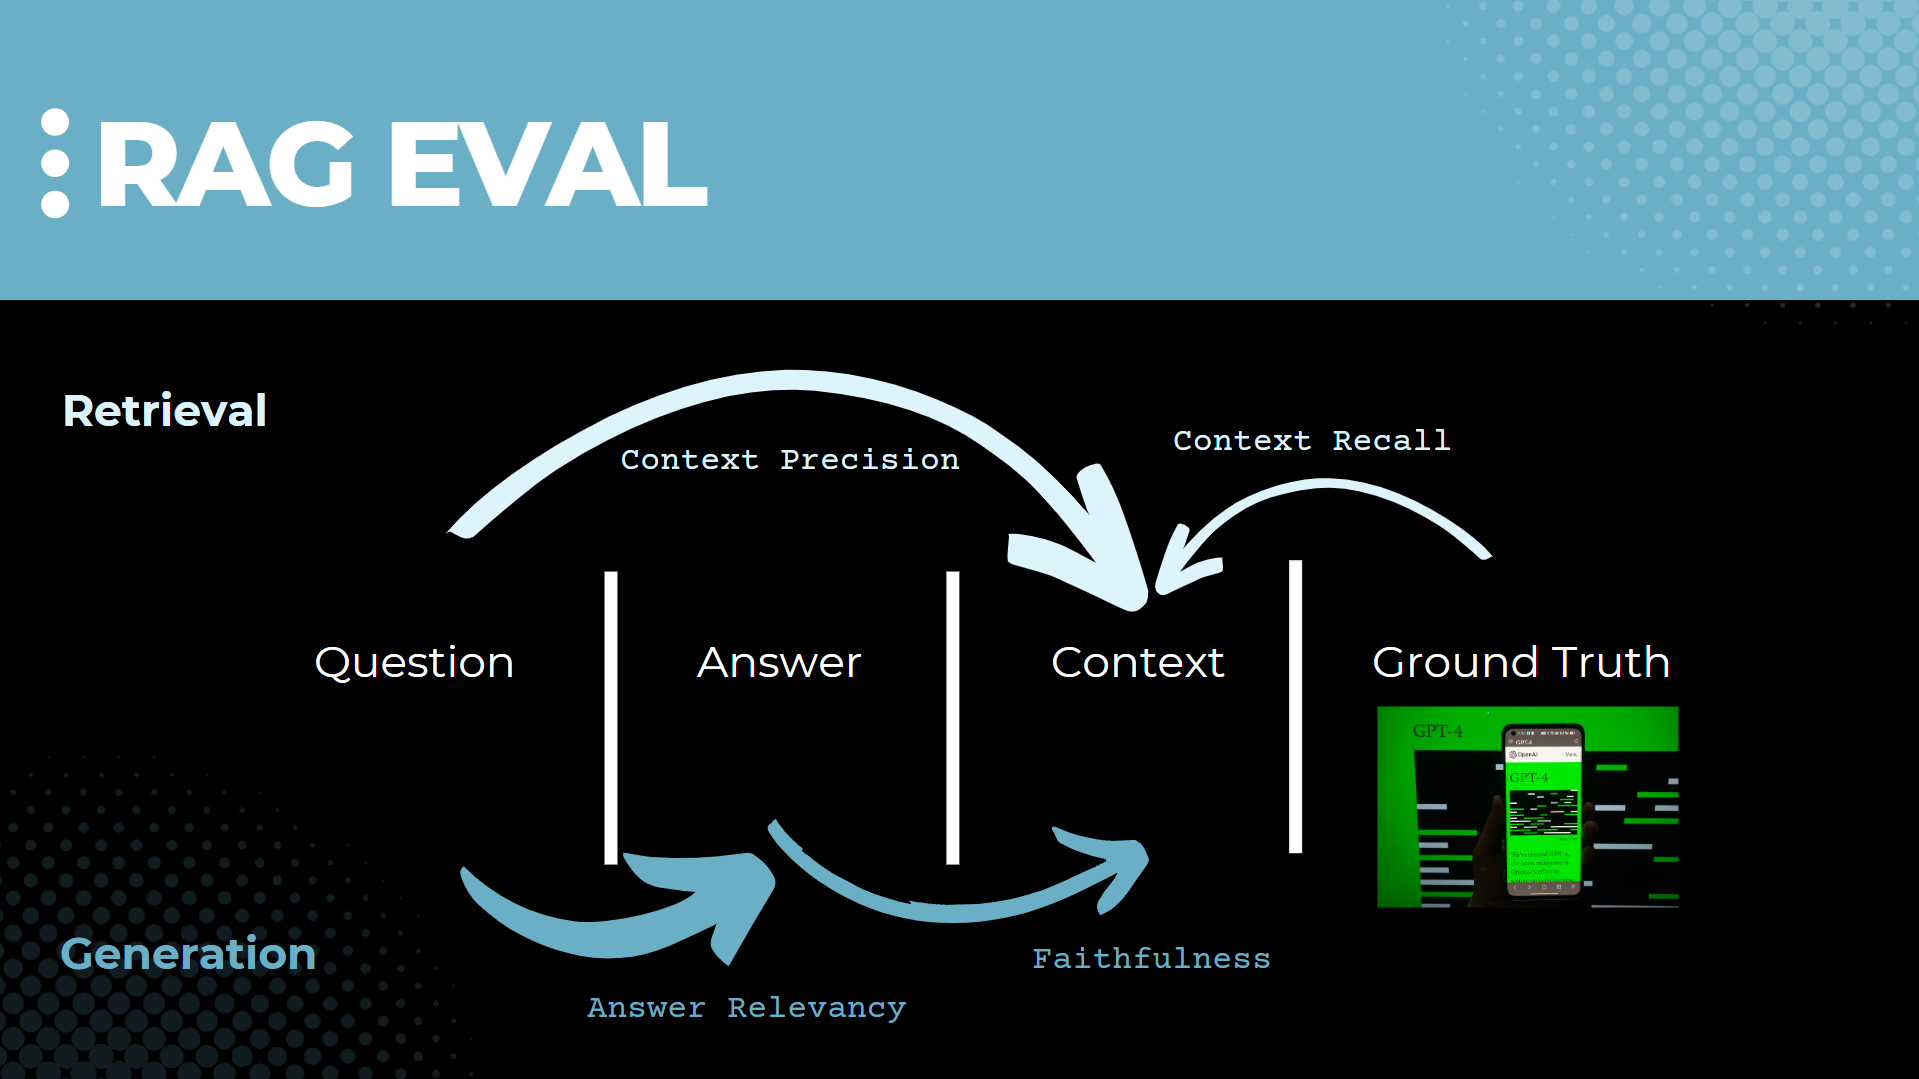](https://docs.ragas.io/en/stable/getstarted/evaluation.html)

## Synthetic Test Set Generation

We can leverage Ragas' [`Synthetic Test Data generation`](https://docs.ragas.io/en/stable/concepts/testset_generation.html) functionality to generate our own synthetic QC pairs - as well as a synthetic ground truth - quite easily!

> NOTE: This process will use `gpt-3.5-turbo-16k` as the base generator and `gpt-4` as the critic - if you're attempting to create a lot of samples please be aware of cost, as well as rate limits.

In [ ]:
from ragas.testset.generator import TestsetGenerator


In [53]:
from ragas.testset.evolutions import simple, reasoning, multi_context
import os
os.environ["OPENAI_API_KEY"] = "<OpenAi-Key>"



In [ ]:
import pandas as pd
df = pd.read_csv("sampled_jobs.csv")

In [ ]:
df = df.dropna(ignore_index=True)

In [ ]:
df.to_csv("test.csv",index=False)

In [ ]:
docs = CSVLoader("test.csv").load()

doc_splits_test = text_splitter.split_documents(docs)

In [ ]:
from ragas.testset.generator import TestsetGenerator
from ragas.testset.evolutions import simple, reasoning, multi_context
import random
generator = TestsetGenerator.with_openai("gpt-4-turbo","gpt-4-turbo")

testset = generator.generate_with_langchain_docs(random.choices(doc_splits_test,k=20), test_size=10, distributions={simple: 0.5, reasoning: 0.25, multi_context: 0.25})

In [ ]:
testset.test_data[0]

In [ ]:
test_df = testset.to_pandas()

In [ ]:
test_df

In [ ]:
test_df=test_df[test_df['ground_truth']!='']

In [ ]:
test_df.to_csv("questions_test.csv",index=False)

In [38]:
import pandas as pd
test_df=pd.read_csv("questions_test.csv")

In [39]:
test_questions = test_df["question"].values.tolist()
test_groundtruths = test_df["ground_truth"].values.tolist()

## Setting Up QA RAG chain for evalution

In [40]:
from langchain import hub

retrieval_qa_prompt = hub.pull("langchain-ai/retrieval-qa-chat")

In [41]:
from langchain.prompts import ChatPromptTemplate

template = """Answer the question based only on the following context:

Context:
{context}

Question:
{question}
"""

prompt = ChatPromptTemplate.from_template(template)

In [42]:
from operator import itemgetter

from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough


retrieval_augmented_qa_chain = (
    # INVOKE CHAIN WITH: {"question" : "<<SOME USER QUESTION>>"}
    # "question" : populated by getting the value of the "question" key
    # "context"  : populated by getting the value of the "question" key and chaining it into the base_retriever
    {"context": itemgetter("question") | compression_retriever, "question": itemgetter("question")}
    # "context"  : is assigned to a RunnablePassthrough object (will not be called or considered in the next step)
    #              by getting the value of the "context" key from the previous step
    | RunnablePassthrough.assign(context=itemgetter("context"))
    # "response" : the "context" and "question" values are used to format our prompt object and then piped
    #              into the LLM and stored in a key called "response"
    # "context"  : populated by getting the value of the "context" key from the previous step
    | {"response": prompt | model, "context": itemgetter("context")}
)

In [43]:
question = test_questions[0]

result = retrieval_augmented_qa_chain.invoke({"question" : question,})

print(result["response"].content)

WARN [launch_slot_with_data] Max tokens to predict exceeds server configuration | params.n_predict=40960 slot.n_predict=4058 tid="132232653275136" timestamp=1720484081
INFO [update_slots] model does not support sliding window, limiting generation | n_ctx=4096 n_predict=3242 n_prompt_tokens=854 tid="132232653275136" timestamp=1720484081
[GIN] 2024/07/09 - 00:14:52 | 200 | 11.670449713s |       127.0.0.1 | POST     "/api/chat"
Based on the provided context, here are some essential skills and strategies for effective warehouse operations management:

* **Strong Leadership and Team Management:**  The ability to motivate, guide, and train warehouse personnel is crucial. 
* **Process Optimization and Implementation:**  Developing and implementing efficient warehouse processes and procedures for inventory management, storage, and distribution is key.
* **Inventory Control and Management:**  Maintaining accurate inventory records, forecasting needs, and ensuring adequate stock levels are vital

In [44]:
pretty_print_docs(result["context"])

Document 1:

job_title: Warehouse Manager
description: <p>We are seeking a highly experienced Warehouse Manager with a minimum of 10 years' expertise in managing warehouse operations within the construction sector. The ideal candidate should possess exceptional organizational skills, a strong understanding of construction materials, and proven leadership abilities.</p><ul><li>Oversee and manage all warehouse operations within the construction company, ensuring efficiency and adherence to safety protocols.</li><li>Develop and implement warehouse processes and procedures to optimize inventory management, storage, and distribution of construction materials and supplies.</li><li>Coordinate and supervise the receiving, storing, packing, and shipping of materials, maintaining accurate inventory records.</li><li>Collaborate with procurement and logistics teams to forecast inventory needs and maintain adequate stock levels for ongoing construction projects.</li><li>Monitor and enforce workplac

## Ragas Evaluation
Check out the specific metrics we'll be using in the Ragas documentation:

- [Faithfulness](https://docs.ragas.io/en/stable/concepts/metrics/faithfulness.html)
- [Answer Relevancy](https://docs.ragas.io/en/stable/concepts/metrics/answer_relevance.html)
- [Context Precision](https://docs.ragas.io/en/stable/concepts/metrics/context_precision.html)
- [Context Recall](https://docs.ragas.io/en/stable/concepts/metrics/context_recall.html)
- [Answer Correctness](https://docs.ragas.io/en/stable/concepts/metrics/answer_correctness.html)



### Gemma2 + Hybrid Search + Rerank

In [45]:
model = ChatOllama(model='gemma2', temperature=0)


In [46]:
compressor = CohereRerank(cohere_api_key=cohere_api_key)
compression_retriever = ContextualCompressionRetriever(
    base_compressor=compressor, base_retriever=ensemble_retriever
)
retrieval_augmented_qa_chain = (
    # INVOKE CHAIN WITH: {"question" : "<<SOME USER QUESTION>>"}
    # "question" : populated by getting the value of the "question" key
    # "context"  : populated by getting the value of the "question" key and chaining it into the base_retriever
    {"context": itemgetter("question") | compression_retriever, "question": itemgetter("question")}
    # "context"  : is assigned to a RunnablePassthrough object (will not be called or considered in the next step)
    #              by getting the value of the "context" key from the previous step
    | RunnablePassthrough.assign(context=itemgetter("context"))
    # "response" : the "context" and "question" values are used to format our prompt object and then piped
    #              into the LLM and stored in a key called "response"
    # "context"  : populated by getting the value of the "context" key from the previous step
    | {"response": prompt | model, "context": itemgetter("context")}
)

In [47]:
answers = []
contexts = []

for question in test_questions:
  response = retrieval_augmented_qa_chain.invoke({"question" : question})
  answers.append(response["response"].content)
  contexts.append([context.page_content for context in response["context"]])

WARN [launch_slot_with_data] Max tokens to predict exceeds server configuration | params.n_predict=40960 slot.n_predict=3242 tid="132232653275136" timestamp=1720484112
INFO [update_slots] model does not support sliding window, limiting generation | n_ctx=4096 n_predict=3242 n_prompt_tokens=854 tid="132232653275136" timestamp=1720484112
[GIN] 2024/07/09 - 00:15:22 | 200 | 10.552857658s |       127.0.0.1 | POST     "/api/chat"
WARN [launch_slot_with_data] Max tokens to predict exceeds server configuration | params.n_predict=40960 slot.n_predict=3242 tid="132232653275136" timestamp=1720484126
INFO [update_slots] model does not support sliding window, limiting generation | n_ctx=4096 n_predict=3239 n_prompt_tokens=857 tid="132232653275136" timestamp=1720484126
[GIN] 2024/07/09 - 00:15:31 | 200 |  5.177313898s |       127.0.0.1 | POST     "/api/chat"
WARN [launch_slot_with_data] Max tokens to predict exceeds server configuration | params.n_predict=40960 slot.n_predict=3239 tid="132232653275

In [48]:
from datasets import Dataset

response_dataset = Dataset.from_dict({
    "question" : test_questions,
    "answer" : answers,
    "contexts" : contexts,
    "ground_truth" : test_groundtruths
})

In [49]:
response_dataset[0]

{'question': 'What skills and strategies are essential for effective Warehouse operations management in a dynamic and fast-paced environment, ensuring safety and regulatory compliance?',
 'answer': 'Based on the provided context, here are some essential skills and strategies for effective Warehouse operations management:\n\n* **Strategic Planning & Layout:**  Setting up an efficient warehouse layout to optimize space utilization and workflow.\n* **Process Optimization:** Implementing and refining warehouse procedures for receiving, storing, packing, shipping, and inventory management to enhance efficiency.\n* **Inventory Management:** Maintaining accurate inventory records, forecasting needs, and ensuring adequate stock levels to meet project demands.\n* **Safety & Compliance:**  Strictly adhering to safety regulations, enforcing workplace safety standards, and conducting regular audits to maintain a secure working environment.\n* **Technology Proficiency:** Utilizing warehouse managem

In [50]:
from ragas import evaluate
from ragas.metrics import (
    faithfulness,
    answer_relevancy,
    answer_correctness,
    context_recall,
    context_precision,
)

metrics = [
    faithfulness,
    answer_relevancy,
    context_recall,
    context_precision,
    answer_correctness,
]

In [54]:
results = evaluate(response_dataset, metrics)

Evaluating:   0%|          | 0/45 [00:00<?, ?it/s]

In [55]:
results

{'faithfulness': 0.7500, 'answer_relevancy': 0.7246, 'context_recall': 0.7444, 'context_precision': 0.7778, 'answer_correctness': 0.4566}

In [56]:
results_df = results.to_pandas()
results_df

question  \
0  What skills and strategies are essential for e...   
1  What are the roles of design and visualization...   
2  What role does having hospitality industry exp...   
3  What are the responsibilities of a Treasury Ac...   
4  "What specific industry experience is required...   
5  "Which strategies should a Warehouse Manager a...   
6  What are key duties of a Warehouse/Stores Mana...   
7  What skills should an Architect Site Engineer ...   
8  What are the key duties of a Warehouse/Stores ...   

                                              answer  \
0  Based on the provided context, here are some e...   
1  The provided text describes the responsibiliti...   
2  The provided text does not explicitly state ho...   
3  Based on the provided context, here are the re...   
4  The provided text describes an Accountant posi...   
5  Based on the provided context, a Warehouse Man...   
6  Based on the provided text, here are the key d...   
7  The provided text focuses on Site Engineers an...   
8  The provided text focuses on the duties of a W...   

                                            contexts  \
0  [job_title: Warehouse Manager\ndescription: <p...   
1  [job_title: Architect Site Engineer\ndescripti...   
2  [job_title: Hospitality Director of Hygiene\nd...   
3  [job_title: Treasury Accountant (Real State)\n...   
4  [job_title: Accountant\ndescription: <ul><li>M...   
5  [job_title: Warehouse Manager\ndescription: <u...   
6  [job_title: Warehouse Manager\ndescription: Jo...   
7  [job_title: Site Engineer\ndescription: <ul><l...   
8  [job_title: Warehouse Manager\ndescription: Jo...   

                                        ground_truth  faithfulness  \
0  The essential skills and strategies for effect...           1.0   
1  The roles of design and visualization software...           0.0   
2  "Strong problem-solving and decision-making ab...           1.0   
3  The responsibilities of a Treasury Accountant ...           1.0   
4  "The specific industry experience required for...           0.0   
5  "Implementing operational P&P to maintain a sa...           1.0   
6  The key duties of a Warehouse/Stores Manager f...           1.0   
7  "An Architect Site Engineer should have excell...           NaN   
8  "Monitoring the inventory process & preparing ...           1.0   

   answer_relevancy  context_recall  context_precision  answer_correctness  
0          0.957967             0.7                1.0            0.695836  
1          0.885532             1.0                1.0            0.613210  
2          0.000000             1.0                1.0            0.212304  
3          0.987457             0.0                1.0            0.769306  
4          0.878361             0.0                0.0            0.220171  
5          0.979238             1.0                1.0            0.416634  
6          0.988579             1.0                1.0            0.769382  
7          0.000000             1.0                0.0            0.209585  
8          0.844399             1.0                1.0            0.203273

### Gemma2 + HyDE

In [57]:
model = ChatOllama(model='gemma2', temperature=0)


In [58]:

retrieval_augmented_qa_chain = (
    # INVOKE CHAIN WITH: {"question" : "<<SOME USER QUESTION>>"}
    # "question" : populated by getting the value of the "question" key
    # "context"  : populated by getting the value of the "question" key and chaining it into the base_retriever
    {"context": itemgetter("question") | HyDE_retrieval_chain, "question": itemgetter("question")}
    # "context"  : is assigned to a RunnablePassthrough object (will not be called or considered in the next step)
    #              by getting the value of the "context" key from the previous step
    | RunnablePassthrough.assign(context=itemgetter("context"))
    # "response" : the "context" and "question" values are used to format our prompt object and then piped
    #              into the LLM and stored in a key called "response"
    # "context"  : populated by getting the value of the "context" key from the previous step
    | {"response": prompt | model, "context": itemgetter("context")}
)

In [59]:
answers = []
contexts = []

for question in test_questions:
  response = retrieval_augmented_qa_chain.invoke({"question" : question})
  answers.append(response["response"].content)
  contexts.append([context.page_content for context in response["context"]])

WARN [launch_slot_with_data] Max tokens to predict exceeds server configuration | params.n_predict=40960 slot.n_predict=3221 tid="132232653275136" timestamp=1720484479
INFO [update_slots] model does not support sliding window, limiting generation | n_ctx=4096 n_predict=4035 n_prompt_tokens=61 tid="132232653275136" timestamp=1720484479
[GIN] 2024/07/09 - 00:21:40 | 200 | 21.093384326s |       127.0.0.1 | POST     "/api/chat"
WARN [launch_slot_with_data] Max tokens to predict exceeds server configuration | params.n_predict=40960 slot.n_predict=4035 tid="132232653275136" timestamp=1720484500
INFO [update_slots] model does not support sliding window, limiting generation | n_ctx=4096 n_predict=3672 n_prompt_tokens=424 tid="132232653275136" timestamp=1720484500
[GIN] 2024/07/09 - 00:21:51 | 200 | 10.908520022s |       127.0.0.1 | POST     "/api/chat"
WARN [launch_slot_with_data] Max tokens to predict exceeds server configuration | params.n_predict=40960 slot.n_predict=3672 tid="1322326532751

In [60]:
from datasets import Dataset

response_dataset = Dataset.from_dict({
    "question" : test_questions,
    "answer" : answers,
    "contexts" : contexts,
    "ground_truth" : test_groundtruths
})

In [61]:
response_dataset[0]

{'question': 'What skills and strategies are essential for effective Warehouse operations management in a dynamic and fast-paced environment, ensuring safety and regulatory compliance?',
 'answer': 'Based on the provided job description, here are some essential skills and strategies for effective Warehouse operations management:\n\n* **Supervisory Skills:**  The job emphasizes "highly effective supervisory skills and techniques" for coaching, workload assignment, and communication with employees.\n* **Process Management:**  Maintaining "5s +FIFO processes" and  "organize and maintain inventory and storage area" highlights the importance of structured processes for efficiency and accuracy.\n* **Data Analysis and Reporting:**  The role requires "measure and report the effectiveness of warehousing activities and employees performance" and "ability to input, retrieve and analyst data," demonstrating the need for data-driven decision making.\n* **Communication and Collaboration:**  "Interfa

In [62]:
from ragas import evaluate
from ragas.metrics import (
    faithfulness,
    answer_relevancy,
    answer_correctness,
    context_recall,
    context_precision,
)

metrics = [
    faithfulness,
    answer_relevancy,
    context_recall,
    context_precision,
    answer_correctness,
]

In [63]:
HyDE_results = evaluate(response_dataset, metrics)

Evaluating:   0%|          | 0/45 [00:00<?, ?it/s]

In [64]:
HyDE_results

{'faithfulness': 0.7111, 'answer_relevancy': 0.8287, 'context_recall': 0.8333, 'context_precision': 1.0000, 'answer_correctness': 0.4610}

In [65]:
results_df = HyDE_results.to_pandas()
results_df

question  \
0  What skills and strategies are essential for e...   
1  What are the roles of design and visualization...   
2  What role does having hospitality industry exp...   
3  What are the responsibilities of a Treasury Ac...   
4  "What specific industry experience is required...   
5  "Which strategies should a Warehouse Manager a...   
6  What are key duties of a Warehouse/Stores Mana...   
7  What skills should an Architect Site Engineer ...   
8  What are the key duties of a Warehouse/Stores ...   

                                              answer  \
0  Based on the provided job description, here ar...   
1  The job description states that an Architect S...   
2  The provided text states that proven experienc...   
3  The provided text describes several responsibi...   
4  The required industry experience is in **hospi...   
5  While the provided text details the responsibi...   
6  Here are the key duties of a Warehouse/Stores ...   
7  Based on the provided context, an Architect Si...   
8  The provided text focuses on the duties of a W...   

                                            contexts  \
0  [job_title: Warehouse Storekeeper\ndescription...   
1  [job_title: Architect Site Engineer\ndescripti...   
2  [job_title: Hospitality Director of Hygiene\nd...   
3  [job_title: Treasury Accountant\ndescription: ...   
4  [job_title: Branch Accountant\ndescription: <u...   
5  [job_title: Warehouse Supervisor\ndescription:...   
6  [job_title: Warehouse Manager\ndescription: <u...   
7  [job_title: Architect Site Engineer\ndescripti...   
8  [job_title: Warehouse Manager\ndescription: <u...   

                                        ground_truth  faithfulness  \
0  The essential skills and strategies for effect...           1.0   
1  The roles of design and visualization software...           1.0   
2  "Strong problem-solving and decision-making ab...           0.0   
3  The responsibilities of a Treasury Accountant ...           0.0   
4  "The specific industry experience required for...           1.0   
5  "Implementing operational P&P to maintain a sa...           1.0   
6  The key duties of a Warehouse/Stores Manager f...           1.0   
7  "An Architect Site Engineer should have excell...           0.4   
8  "Monitoring the inventory process & preparing ...           1.0   

   answer_relevancy  context_recall  context_precision  answer_correctness  
0          0.957967             0.5                1.0            0.536473  
1          0.922228             1.0                1.0            0.602592  
2          0.898376             1.0                1.0                 NaN  
3          0.975713             0.0                1.0            0.230845  
4          0.912683             1.0                1.0            0.527546  
5          0.910926             1.0                1.0            0.196394  
6          0.956603             1.0                1.0            0.655059  
7          0.923876             1.0                1.0            0.737124  
8          0.000000             1.0                1.0            0.202195

### LLama3 + Hybrid Search + Rerank

In [71]:
model = ChatOllama(model='llama3', temperature=0)


In [72]:
compressor = CohereRerank(cohere_api_key=cohere_api_key)
compression_retriever = ContextualCompressionRetriever(
    base_compressor=compressor, base_retriever=ensemble_retriever
)
retrieval_augmented_qa_chain = (
    # INVOKE CHAIN WITH: {"question" : "<<SOME USER QUESTION>>"}
    # "question" : populated by getting the value of the "question" key
    # "context"  : populated by getting the value of the "question" key and chaining it into the base_retriever
    {"context": itemgetter("question") | compression_retriever, "question": itemgetter("question")}
    # "context"  : is assigned to a RunnablePassthrough object (will not be called or considered in the next step)
    #              by getting the value of the "context" key from the previous step
    | RunnablePassthrough.assign(context=itemgetter("context"))
    # "response" : the "context" and "question" values are used to format our prompt object and then piped
    #              into the LLM and stored in a key called "response"
    # "context"  : populated by getting the value of the "context" key from the previous step
    | {"response": prompt | model, "context": itemgetter("context")}
)

In [73]:
answers = []
contexts = []

for question in test_questions:
  response = retrieval_augmented_qa_chain.invoke({"question" : question})
  answers.append(response["response"].content)
  contexts.append([context.page_content for context in response["context"]])

time=2024-07-09T00:28:08.515Z level=INFO source=memory.go:309 msg="offload to cuda" layers.requested=-1 layers.model=33 layers.offload=33 layers.split="" memory.available="[14.6 GiB]" memory.required.full="5.0 GiB" memory.required.partial="5.0 GiB" memory.required.kv="256.0 MiB" memory.required.allocations="[5.0 GiB]" memory.weights.total="3.9 GiB" memory.weights.repeating="3.5 GiB" memory.weights.nonrepeating="411.0 MiB" memory.graph.full="164.0 MiB" memory.graph.partial="677.5 MiB"
time=2024-07-09T00:28:08.515Z level=INFO source=server.go:368 msg="starting llama server" cmd="/tmp/ollama3742789039/runners/cuda_v11/ollama_llama_server --model /root/.ollama/models/blobs/sha256-6a0746a1ec1aef3e7ec53868f220ff6e389f6f8ef87a01d77c96807de94ca2aa --ctx-size 2048 --batch-size 512 --embedding --log-disable --n-gpu-layers 33 --parallel 1 --port 33305"
time=2024-07-09T00:28:08.516Z level=INFO source=sched.go:382 msg="loaded runners" count=1
time=2024-07-09T00:28:08.516Z level=INFO source=server.g

INFO [main] build info | build=1 commit="7c26775" tid="138232847958016" timestamp=1720484888
INFO [main] system info | n_threads=2 n_threads_batch=-1 system_info="AVX = 1 | AVX_VNNI = 0 | AVX2 = 0 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | AVX512_BF16 = 0 | FMA = 0 | NEON = 0 | SVE = 0 | ARM_FMA = 0 | F16C = 0 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | MATMUL_INT8 = 0 | LLAMAFILE = 1 | " tid="138232847958016" timestamp=1720484888 total_threads=4
INFO [main] HTTP server listening | hostname="127.0.0.1" n_threads_http="3" port="33305" tid="138232847958016" timestamp=1720484888


llama_model_loader: - kv  16:                  tokenizer.ggml.token_type arr[i32,128256]  = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
time=2024-07-09T00:28:08.767Z level=INFO source=server.go:594 msg="waiting for server to become available" status="llm server loading model"
llama_model_loader: - kv  17:                      tokenizer.ggml.merges arr[str,280147]  = ["Ġ Ġ", "Ġ ĠĠĠ", "ĠĠ ĠĠ", "...
llama_model_loader: - kv  18:                tokenizer.ggml.bos_token_id u32              = 128000
llama_model_loader: - kv  19:                tokenizer.ggml.eos_token_id u32              = 128009
llama_model_loader: - kv  20:                    tokenizer.chat_template str              = {% set loop_messages = messages %}{% ...
llama_model_loader: - kv  21:               general.quantization_version u32              = 2
llama_model_loader: - type  f32:   65 tensors
llama_model_loader: - type q4_0:  225 tensors
llama_model_loader: - type q6_K:    1 tensors
llm_load_vocab: special tokens cache siz

INFO [main] model loaded | tid="138232847958016" timestamp=1720484914


time=2024-07-09T00:28:34.616Z level=INFO source=server.go:599 msg="llama runner started in 26.10 seconds"


[GIN] 2024/07/09 - 00:28:44 | 200 | 36.512488245s |       127.0.0.1 | POST     "/api/chat"
[GIN] 2024/07/09 - 00:28:52 | 200 |  4.308246166s |       127.0.0.1 | POST     "/api/chat"
[GIN] 2024/07/09 - 00:29:04 | 200 |  8.222981797s |       127.0.0.1 | POST     "/api/chat"
[GIN] 2024/07/09 - 00:29:13 | 200 |  5.515628567s |       127.0.0.1 | POST     "/api/chat"
[GIN] 2024/07/09 - 00:29:23 | 200 |  5.885175846s |       127.0.0.1 | POST     "/api/chat"
[GIN] 2024/07/09 - 00:29:35 | 200 |   7.78612754s |       127.0.0.1 | POST     "/api/chat"
[GIN] 2024/07/09 - 00:29:45 | 200 |  6.124566761s |       127.0.0.1 | POST     "/api/chat"
[GIN] 2024/07/09 - 00:30:01 | 200 | 11.525611778s |       127.0.0.1 | POST     "/api/chat"
[GIN] 2024/07/09 - 00:30:10 | 200 |  5.044227664s |       127.0.0.1 | POST     "/api/chat"


In [74]:
from datasets import Dataset

response_dataset = Dataset.from_dict({
    "question" : test_questions,
    "answer" : answers,
    "contexts" : contexts,
    "ground_truth" : test_groundtruths
})

In [75]:
response_dataset[0]

{'question': 'What skills and strategies are essential for effective Warehouse operations management in a dynamic and fast-paced environment, ensuring safety and regulatory compliance?',
 'answer': 'Based on the provided context, the following skills and strategies are essential for effective Warehouse operations management:\n\n1. **Exceptional organizational skills**: The ability to manage multiple tasks, prioritize, and maintain accurate records is crucial.\n2. **Strong leadership skills**: Leading and mentoring warehouse personnel, providing training and guidance as required, is vital for efficient operations.\n3. **Proven problem-solving abilities**: Identifying and resolving issues promptly ensures minimal disruptions to operations and maintains a safe working environment.\n4. **Excellent communication skills**: Collaborating with procurement, logistics, construction project managers, and other stakeholders requires effective communication.\n5. **Knowledge of warehouse management 

In [76]:
from ragas import evaluate
from ragas.metrics import (
    faithfulness,
    answer_relevancy,
    answer_correctness,
    context_recall,
    context_precision,
)

metrics = [
    faithfulness,
    answer_relevancy,
    context_recall,
    context_precision,
    answer_correctness,
]

In [77]:
LLama3_Hybrid_results = evaluate(response_dataset, metrics)

Evaluating:   0%|          | 0/45 [00:00<?, ?it/s]

In [78]:
LLama3_Hybrid_results

{'faithfulness': 0.7500, 'answer_relevancy': 0.9600, 'context_recall': 0.7444, 'context_precision': 0.7778, 'answer_correctness': 0.4504}

In [79]:
results_df = LLama3_Hybrid_results.to_pandas()
results_df

question  \
0  What skills and strategies are essential for e...   
1  What are the roles of design and visualization...   
2  What role does having hospitality industry exp...   
3  What are the responsibilities of a Treasury Ac...   
4  "What specific industry experience is required...   
5  "Which strategies should a Warehouse Manager a...   
6  What are key duties of a Warehouse/Stores Mana...   
7  What skills should an Architect Site Engineer ...   
8  What are the key duties of a Warehouse/Stores ...   

                                              answer  \
0  Based on the provided context, the following s...   
1  Based on the provided context, it can be infer...   
2  Based on the provided context, it can be infer...   
3  Based on the provided context, the responsibil...   
4  Based on the provided context, there is no men...   
5  Based on the provided context, I would recomme...   
6  Based on the provided context, the key duties ...   
7  Based on the provided context, here are some k...   
8  Based on the provided context, the key duties ...   

                                            contexts  \
0  [job_title: Warehouse Manager\ndescription: <p...   
1  [job_title: Architect Site Engineer\ndescripti...   
2  [job_title: Hospitality Director of Hygiene\nd...   
3  [job_title: Treasury Accountant (Real State)\n...   
4  [job_title: Accountant\ndescription: <ul><li>M...   
5  [job_title: Warehouse Manager\ndescription: <u...   
6  [job_title: Warehouse Manager\ndescription: Jo...   
7  [job_title: Site Engineer\ndescription: <ul><l...   
8  [job_title: Warehouse Manager\ndescription: Jo...   

                                        ground_truth  faithfulness  \
0  The essential skills and strategies for effect...           1.0   
1  The roles of design and visualization software...           NaN   
2  "Strong problem-solving and decision-making ab...           1.0   
3  The responsibilities of a Treasury Accountant ...           1.0   
4  "The specific industry experience required for...           0.0   
5  "Implementing operational P&P to maintain a sa...           1.0   
6  The key duties of a Warehouse/Stores Manager f...           1.0   
7  "An Architect Site Engineer should have excell...           0.0   
8  "Monitoring the inventory process & preparing ...           1.0   

   answer_relevancy  context_recall  context_precision  answer_correctness  
0          0.961556             0.7                1.0            0.682607  
1          0.921057             1.0                1.0            0.230465  
2          0.996787             1.0                1.0            0.513322  
3          1.000000             0.0                1.0            0.559325  
4          0.883717             0.0                0.0            0.229654  
5          0.979238             1.0                1.0            0.391997  
6          0.978002             1.0                1.0            0.778137  
7          0.920052             1.0                0.0            0.463355  
8          0.999999             1.0                1.0            0.205087

### LLama3 + HyDE

In [80]:
model = ChatOllama(model='llama3', temperature=0)


In [81]:

retrieval_augmented_qa_chain = (
    # INVOKE CHAIN WITH: {"question" : "<<SOME USER QUESTION>>"}
    # "question" : populated by getting the value of the "question" key
    # "context"  : populated by getting the value of the "question" key and chaining it into the base_retriever
    {"context": itemgetter("question") | HyDE_retrieval_chain, "question": itemgetter("question")}
    # "context"  : is assigned to a RunnablePassthrough object (will not be called or considered in the next step)
    #              by getting the value of the "context" key from the previous step
    | RunnablePassthrough.assign(context=itemgetter("context"))
    # "response" : the "context" and "question" values are used to format our prompt object and then piped
    #              into the LLM and stored in a key called "response"
    # "context"  : populated by getting the value of the "context" key from the previous step
    | {"response": prompt | model, "context": itemgetter("context")}
)

In [ ]:
answers = []
contexts = []

for question in test_questions:
  response = retrieval_augmented_qa_chain.invoke({"question" : question})
  answers.append(response["response"].content)
  contexts.append([context.page_content for context in response["context"]])

In [83]:
from datasets import Dataset

response_dataset = Dataset.from_dict({
    "question" : test_questions,
    "answer" : answers,
    "contexts" : contexts,
    "ground_truth" : test_groundtruths
})

In [84]:
response_dataset[0]

{'question': 'What skills and strategies are essential for effective Warehouse operations management in a dynamic and fast-paced environment, ensuring safety and regulatory compliance?',
 'answer': 'Based on the provided context, the following skills and strategies are essential for effective Warehouse operations management:\n\n1. **5S + FIFO processes**: Maintaining a clean, organized, and efficient warehouse through 5S principles (Sort, Set in Order, Shine, Standardize, Sustain) and First-In-First-Out (FIFO) inventory management.\n2. **Effective communication**: Interfacing with all integrated departments (sales, finance, distribution) to solve issues, ensuring accurate shipments and inventory transactions.\n3. **Staffing and workload assignment**: Determining staffing levels and assigning workload effectively to ensure efficient operations and employee performance measurement.\n4. **Inventory management**: Organizing and maintaining inventory and storage areas, ensuring accuracy of 

In [85]:
from ragas import evaluate
from ragas.metrics import (
    faithfulness,
    answer_relevancy,
    answer_correctness,
    context_recall,
    context_precision,
)

metrics = [
    faithfulness,
    answer_relevancy,
    context_recall,
    context_precision,
    answer_correctness,
]

In [86]:
HyDE_LLama3_results = evaluate(response_dataset, metrics)

Evaluating:   0%|          | 0/45 [00:00<?, ?it/s]

In [87]:
HyDE_results

{'faithfulness': 0.7111, 'answer_relevancy': 0.8287, 'context_recall': 0.8333, 'context_precision': 1.0000, 'answer_correctness': 0.4610}

In [88]:
HyDE_LLama3_results 

{'faithfulness': 0.9778, 'answer_relevancy': 0.9432, 'context_recall': 0.8333, 'context_precision': 1.0000, 'answer_correctness': 0.4315}

In [89]:
results_df = HyDE_LLama3_results.to_pandas()
results_df

question  \
0  What skills and strategies are essential for e...   
1  What are the roles of design and visualization...   
2  What role does having hospitality industry exp...   
3  What are the responsibilities of a Treasury Ac...   
4  "What specific industry experience is required...   
5  "Which strategies should a Warehouse Manager a...   
6  What are key duties of a Warehouse/Stores Mana...   
7  What skills should an Architect Site Engineer ...   
8  What are the key duties of a Warehouse/Stores ...   

                                              answer  \
0  Based on the provided context, the following s...   
1  According to the context, the role of design a...   
2  Based on the provided context, it can be infer...   
3  Based on the provided context, the responsibil...   
4  According to the context, the specific industr...   
5  Based on the provided context, it appears that...   
6  Based on the provided context, the key duties ...   
7  Based on the provided context, an Architect Si...   
8  Based on the provided context, the key duties ...   

                                            contexts  \
0  [job_title: Warehouse Storekeeper\ndescription...   
1  [job_title: Architect Site Engineer\ndescripti...   
2  [job_title: Hospitality Director of Hygiene\nd...   
3  [job_title: Treasury Accountant\ndescription: ...   
4  [job_title: Branch Accountant\ndescription: <u...   
5  [job_title: Warehouse Supervisor\ndescription:...   
6  [job_title: Warehouse Manager\ndescription: <u...   
7  [job_title: Architect Site Engineer\ndescripti...   
8  [job_title: Warehouse Manager\ndescription: <u...   

                                        ground_truth  faithfulness  \
0  The essential skills and strategies for effect...           1.0   
1  The roles of design and visualization software...           1.0   
2  "Strong problem-solving and decision-making ab...           1.0   
3  The responsibilities of a Treasury Accountant ...           1.0   
4  "The specific industry experience required for...           1.0   
5  "Implementing operational P&P to maintain a sa...           0.8   
6  The key duties of a Warehouse/Stores Manager f...           1.0   
7  "An Architect Site Engineer should have excell...           1.0   
8  "Monitoring the inventory process & preparing ...           1.0   

   answer_relevancy  context_recall  context_precision  answer_correctness  
0          0.961556             0.5                1.0            0.463192  
1          0.910582             1.0                1.0            0.227607  
2          0.892996             1.0                1.0            0.353585  
3          1.000000             0.0                1.0            0.614326  
4          0.939072             1.0                1.0            0.545584  
5          0.870308             1.0                1.0            0.367371  
6          0.988423             1.0                1.0            0.676685  
7          0.930930             1.0                1.0                 NaN  
8          0.994790             1.0                1.0            0.203904

In [90]:

import pandas as pd

df_original = pd.DataFrame(list(results.items()), columns=['Metric', 'Gemma2 Hybrid ReRank'])
df_comparison = pd.DataFrame(list(LLama3_Hybrid_results.items()), columns=['Metric', 'LLama3 Hybrid ReRank'])

df_merged = pd.merge(df_original, df_comparison, on='Metric')

df_merged['Delta'] = df_merged['LLama3 Hybrid ReRank'] - df_merged['Gemma2 Hybrid ReRank']

df_merged

Metric  Gemma2 Hybrid ReRank  LLama3 Hybrid ReRank     Delta
0        faithfulness              0.750000              0.750000  0.000000
1    answer_relevancy              0.724615              0.960045  0.235430
2      context_recall              0.744444              0.744444  0.000000
3   context_precision              0.777778              0.777778  0.000000
4  answer_correctness              0.456633              0.450439 -0.006195

In [91]:

import pandas as pd

df_original = pd.DataFrame(list(HyDE_results.items()), columns=['Metric', 'Gemma2 HyDE'])
df_comparison = pd.DataFrame(list(HyDE_LLama3_results.items()), columns=['Metric', 'LLama3 HyDE'])

df_merged = pd.merge(df_original, df_comparison, on='Metric')

df_merged['Delta'] = df_merged['LLama3 HyDE'] - df_merged['Gemma2 HyDE']

df_merged

Metric  Gemma2 HyDE  LLama3 HyDE     Delta
0        faithfulness     0.711111     0.977778  0.266667
1    answer_relevancy     0.828708     0.943184  0.114476
2      context_recall     0.833333     0.833333  0.000000
3   context_precision     1.000000     1.000000  0.000000
4  answer_correctness     0.461029     0.431532 -0.029497

# **LangSmith Evaluators**
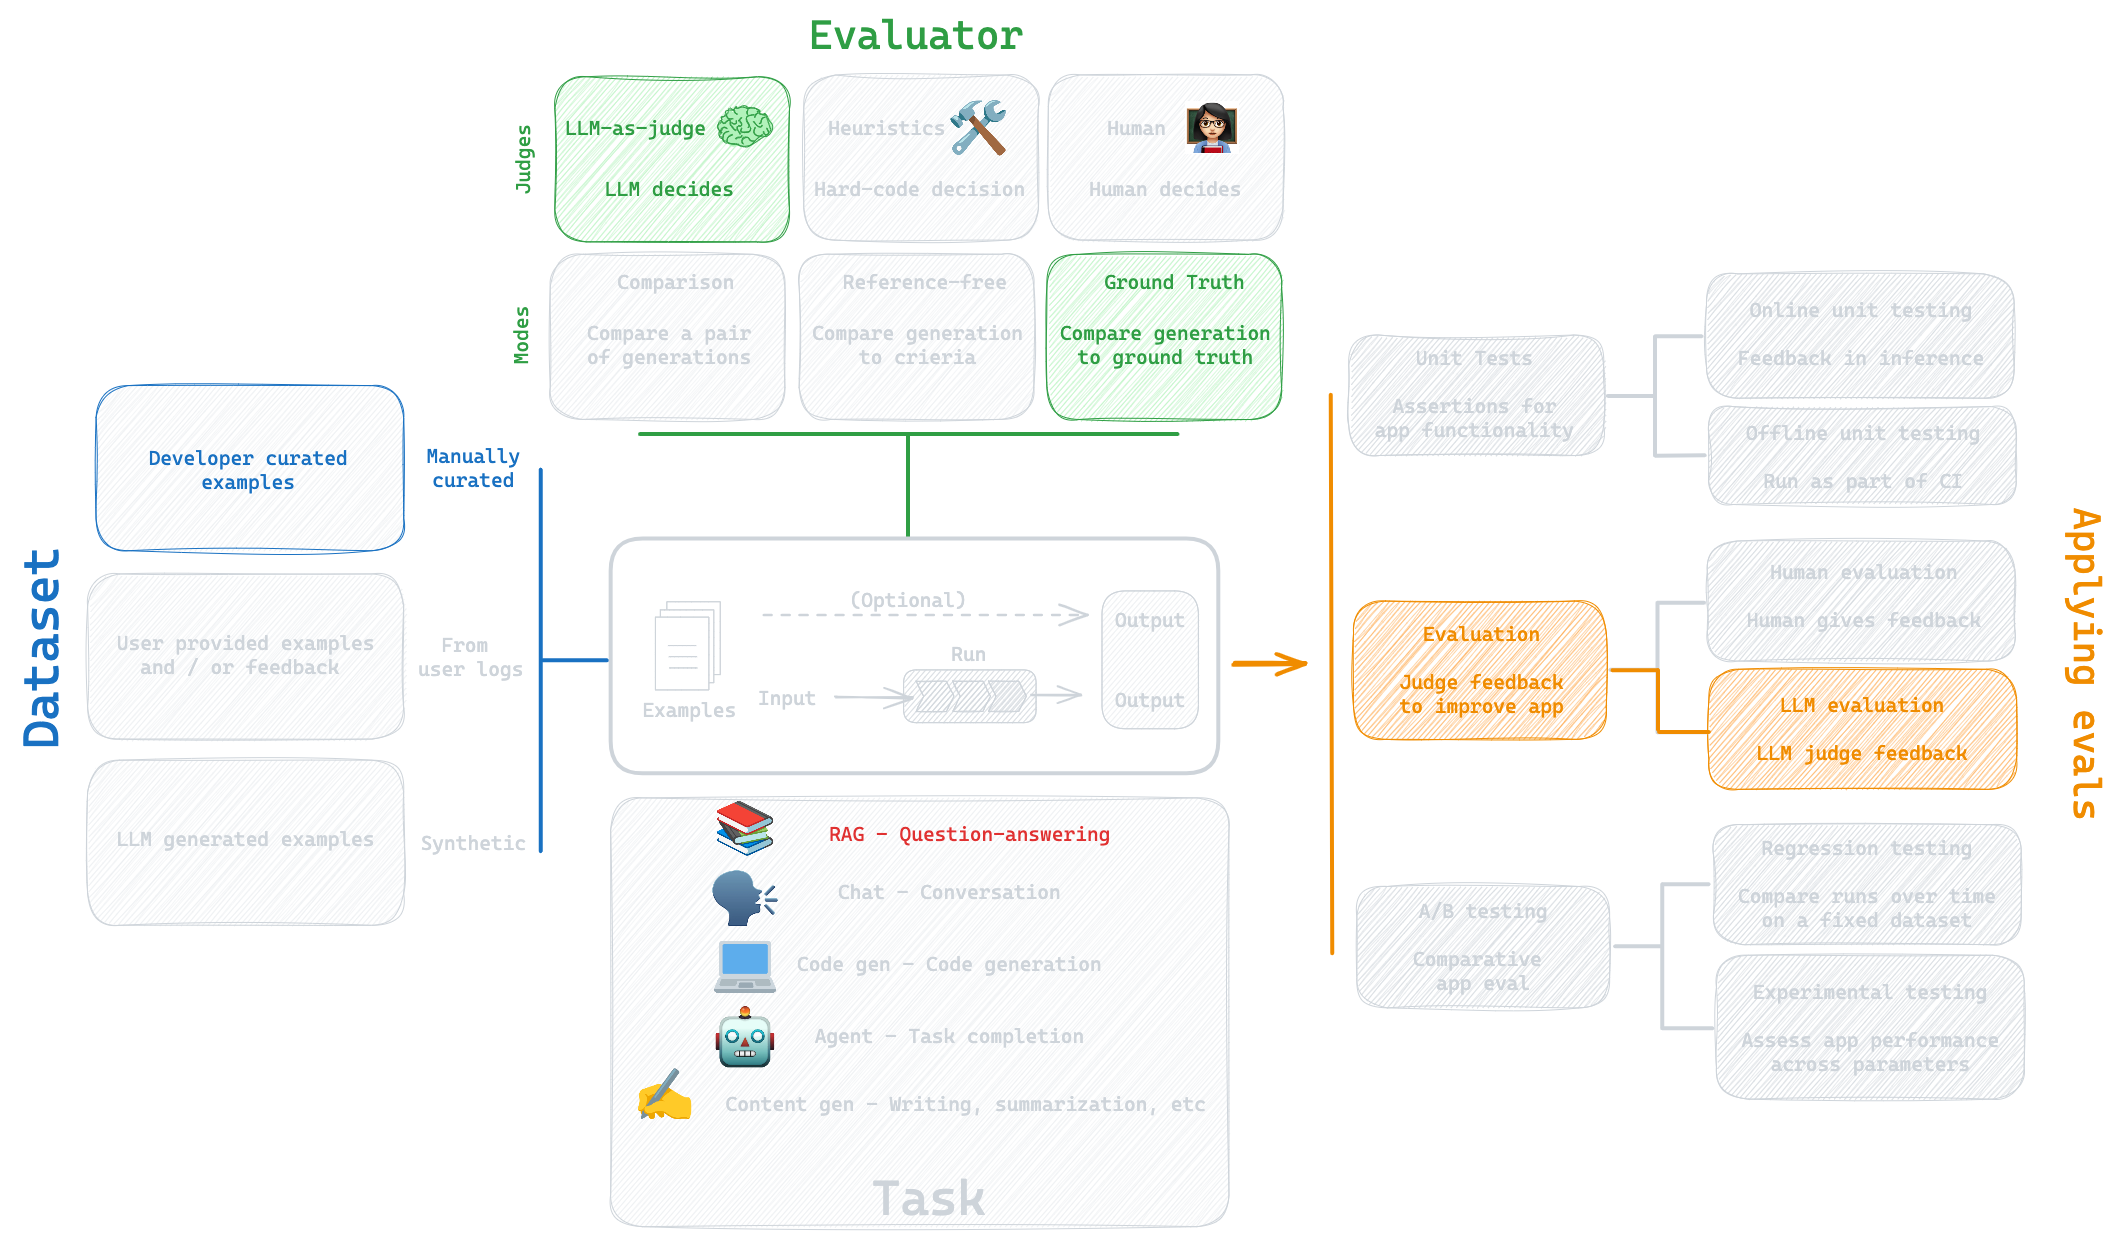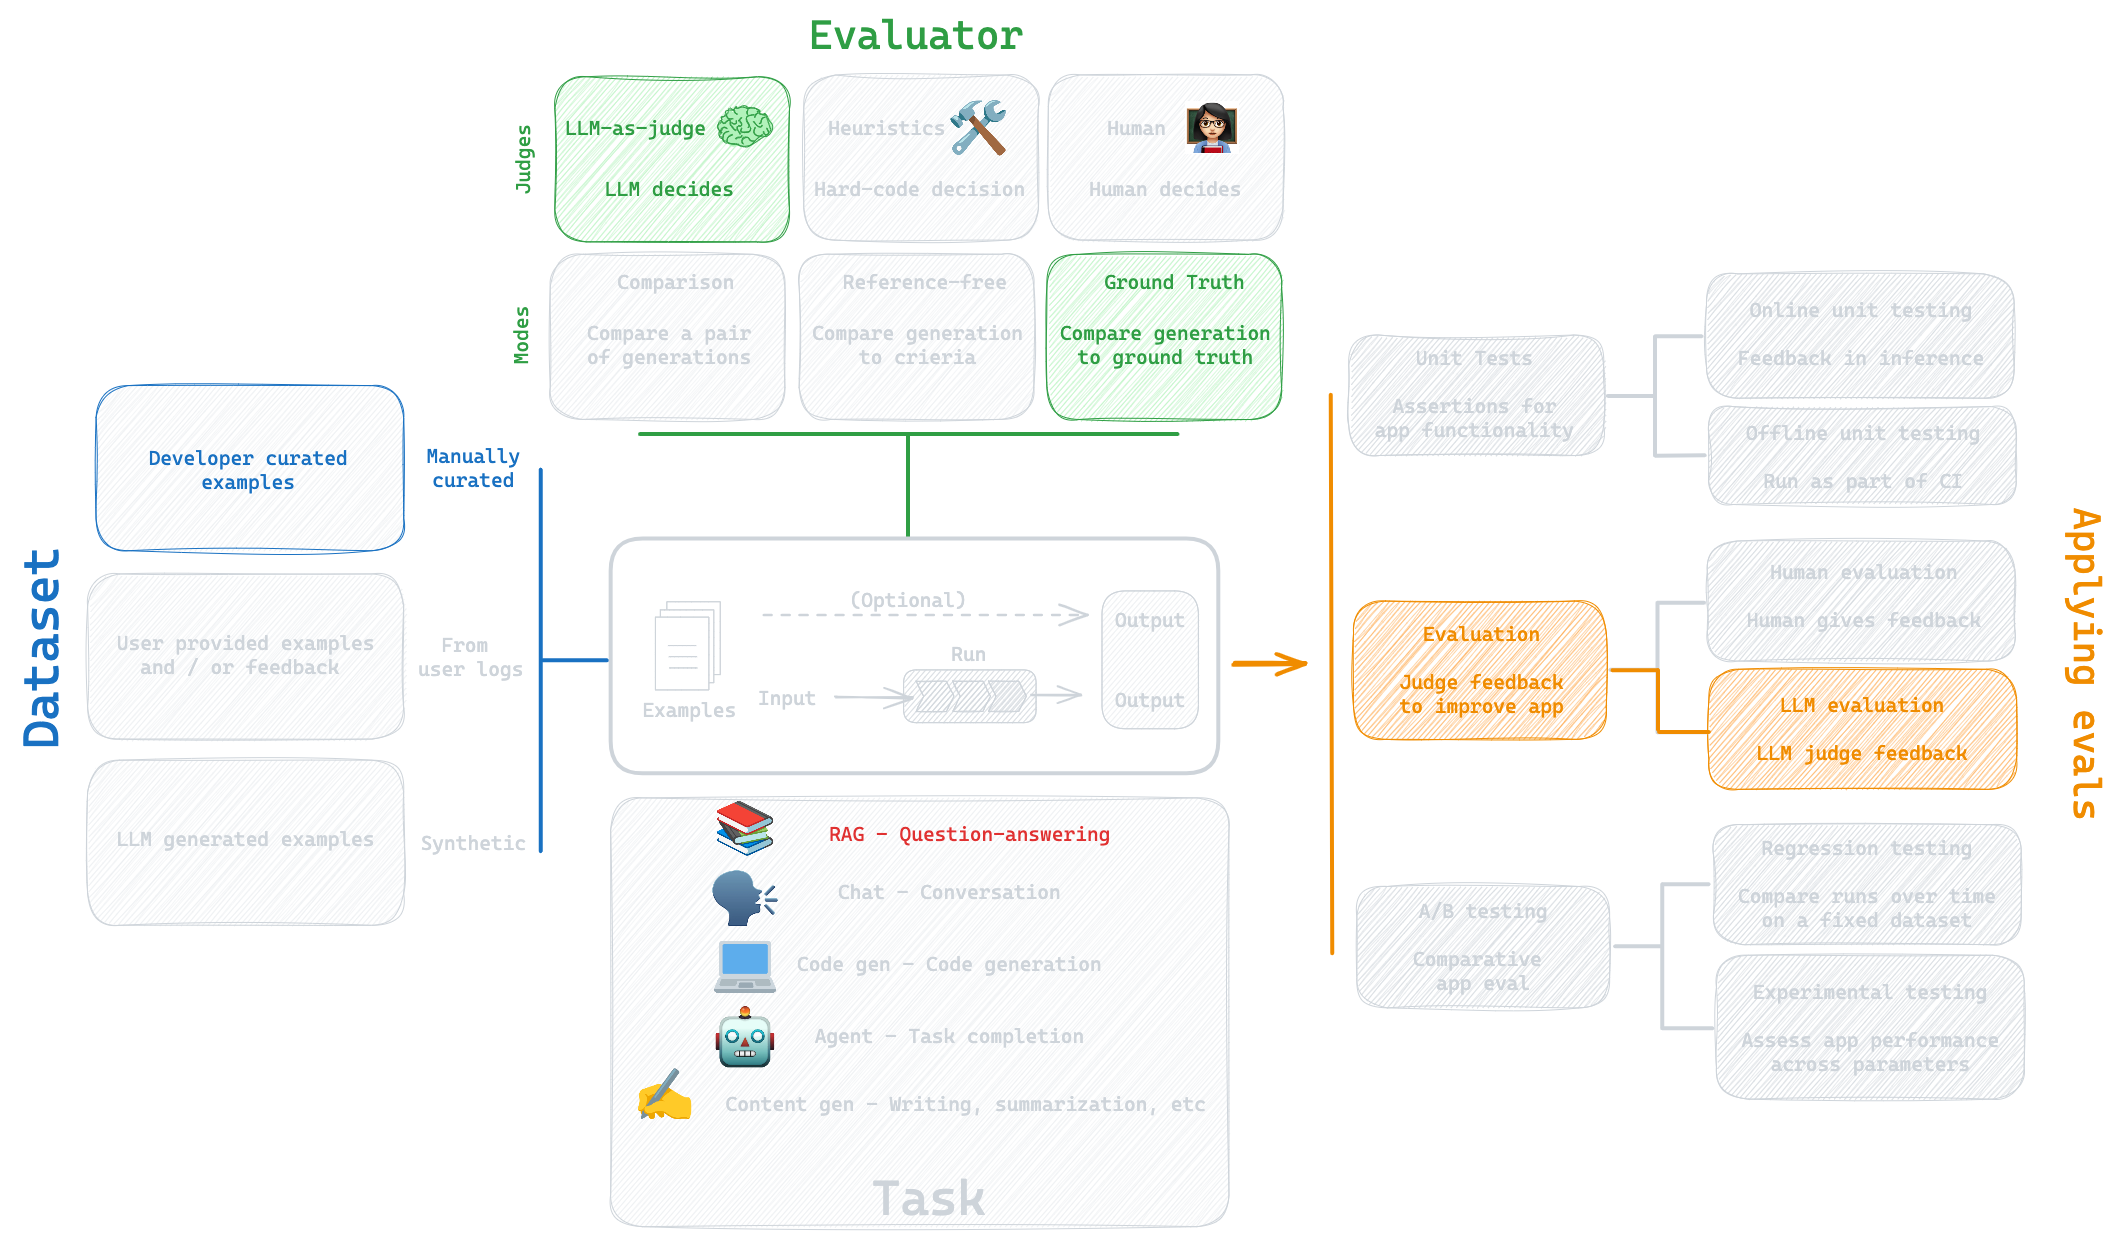

In [97]:
from langchain import hub

retrieval_qa_prompt = hub.pull("langchain-ai/retrieval-qa-chat")

In [98]:
from langchain.prompts import ChatPromptTemplate

template = """Answer the question based only on the following context:

Context:
{context}

Question:
{question}
"""

prompt = ChatPromptTemplate.from_template(template)

In [114]:
model = ChatOllama(model='llama3', temperature=0)


In [115]:
from operator import itemgetter

from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough


retrieval_augmented_qa_chain = (
    # INVOKE CHAIN WITH: {"question" : "<<SOME USER QUESTION>>"}
    # "question" : populated by getting the value of the "question" key
    # "context"  : populated by getting the value of the "question" key and chaining it into the base_retriever
    {"context": itemgetter("question") | HyDE_retrieval_chain, "question": itemgetter("question")}
    # "context"  : is assigned to a RunnablePassthrough object (will not be called or considered in the next step)
    #              by getting the value of the "context" key from the previous step
    | RunnablePassthrough.assign(context=itemgetter("context"))
    # "response" : the "context" and "question" values are used to format our prompt object and then piped
    #              into the LLM and stored in a key called "response"
    # "context"  : populated by getting the value of the "context" key from the previous step
    | {"response": prompt | model, "context": itemgetter("context")}
)

In [106]:
### RAG

from langsmith import traceable
from langsmith.wrappers import wrap_openai

class RagBot:
    
    def __init__(self, retriever,):
        self._retriever = retriever


    @traceable()
    def retrieve_docs(self, question):
        return self._retriever.invoke({"question":question})

    @traceable()
    def get_answer(self, question: str):
        result = self.retrieve_docs(question)
        # Evaluators will expect "answer" and "contexts"
        return {
            "answer": result["response"].content,
            "contexts": [doc.page_content for doc in result["context"]],
        }


rag_bot = RagBot(retrieval_augmented_qa_chain)

In [95]:
from langsmith import Client
qa_pairs = [{"question": q, "answer": a} for q, a in zip(test_questions, test_groundtruths)]

# Create dataset
client = Client()
dataset_name = "Job_Posting_Tests"
dataset = client.create_dataset(
    dataset_name=dataset_name,
    description="QA pairs about LCEL.",
)
client.create_examples(
    inputs=[{"question": q} for q in test_questions],
    outputs=[{"answer": a} for a in test_groundtruths],
    dataset_id=dataset.id,
)

## RAG Evaluators
## Type 1: Reference Answer
 compare our RAG chain answer to a reference answer.
![](https://docs.smith.langchain.com/assets/images/langsmith_rag_eval-ef2bf9c7e6cbc275f3a6c5a8019d9c1c.png)




In [96]:
# RAG chain
def predict_rag_answer(example: dict):
    """Use this for answer evaluation"""
    response = rag_bot.get_answer(example["question"])
    return {"answer": response["answer"]}

def predict_rag_answer_with_context(example: dict):
    """Use this for evaluation of retrieved documents and hallucinations"""
    response = rag_bot.get_answer(example["question"])
    return {"answer": response["answer"], "contexts": response["contexts"]}

In [ ]:
response = rag_bot.get_answer(test_questions[0])


In [110]:
response['answer']

'Based on the provided context, the following skills and strategies are essential for effective Warehouse operations management:\n\n1. **Exceptional organizational skills**: The ability to manage multiple tasks, prioritize, and maintain accurate records is crucial.\n2. **Strong leadership skills**: Leading and mentoring warehouse personnel, providing training and guidance as required, is vital for efficient operations.\n3. **Proven problem-solving abilities**: Identifying and resolving issues promptly ensures minimal disruptions to operations and maintains a safe working environment.\n4. **Excellent communication skills**: Collaborating with procurement, logistics, construction project managers, and other stakeholders requires effective communication.\n5. **Knowledge of warehouse management systems (WMS) and software**: Utilizing WMS or other relevant software to track inventory movements and manage warehouse operations efficiently is essential.\n6. **Inventory management expertise**: 

In [111]:
from langsmith.evaluation import LangChainStringEvaluator, evaluate

# Evaluator
qa_evalulator = [
    LangChainStringEvaluator(
        "cot_qa",
        prepare_data=lambda run, example: {
            "prediction": run.outputs["answer"],
            "reference": example.outputs["answer"],
            "input": example.inputs["question"],
        },
    )
]
dataset_name = "Job_Posting_Tests"
experiment_results = evaluate(
    predict_rag_answer,
    data=dataset_name,
    evaluators=qa_evalulator,
    experiment_prefix="rag-qa-oai",
    metadata={"variant": "LCEL context, gpt-3.5-turbo"},
)

View the evaluation results for experiment: 'rag-qa-oai-1f2342a0' at:
https://smith.langchain.com/o/ede99342-7903-58f3-b9a6-8a33f50f4dcc/datasets/49aae5d4-0f7f-4702-b4c0-dff2cb04a41f/compare?selectedSessions=12a6219b-f1d8-400d-b7b3-be7ea5947099




0it [00:00, ?it/s]

[GIN] 2024/07/09 - 01:05:31 | 200 |  7.414841139s |       127.0.0.1 | POST     "/api/chat"
[GIN] 2024/07/09 - 01:05:36 | 200 | 12.535179002s |       127.0.0.1 | POST     "/api/chat"
[GIN] 2024/07/09 - 01:05:41 | 200 |  18.01093162s |       127.0.0.1 | POST     "/api/chat"
[GIN] 2024/07/09 - 01:05:46 | 200 | 22.990701973s |       127.0.0.1 | POST     "/api/chat"
[GIN] 2024/07/09 - 01:05:56 | 200 | 32.714602239s |       127.0.0.1 | POST     "/api/chat"
[GIN] 2024/07/09 - 01:06:05 | 200 | 41.497344961s |       127.0.0.1 | POST     "/api/chat"
[GIN] 2024/07/09 - 01:06:11 | 200 | 47.882538597s |       127.0.0.1 | POST     "/api/chat"
[GIN] 2024/07/09 - 01:06:15 | 200 | 51.854536647s |       127.0.0.1 | POST     "/api/chat"
[GIN] 2024/07/09 - 01:06:20 | 200 | 45.074403568s |       127.0.0.1 | POST     "/api/chat"


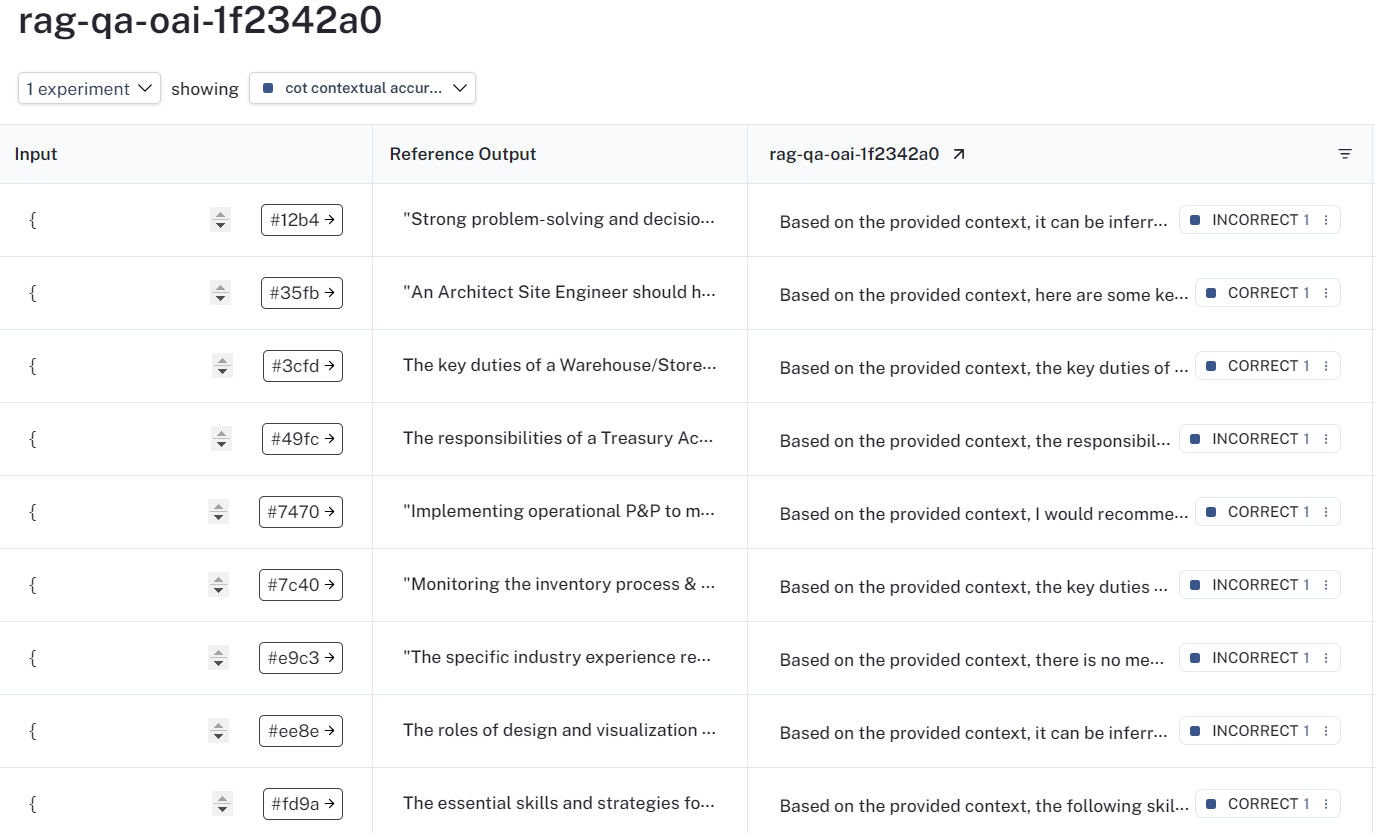

<ExperimentResults rag-qa-oai-1f2342a0>

## RAG Evaluators
## Type 2: Answer Hallucination
compare our RAG chain answer to the retrieved documents.
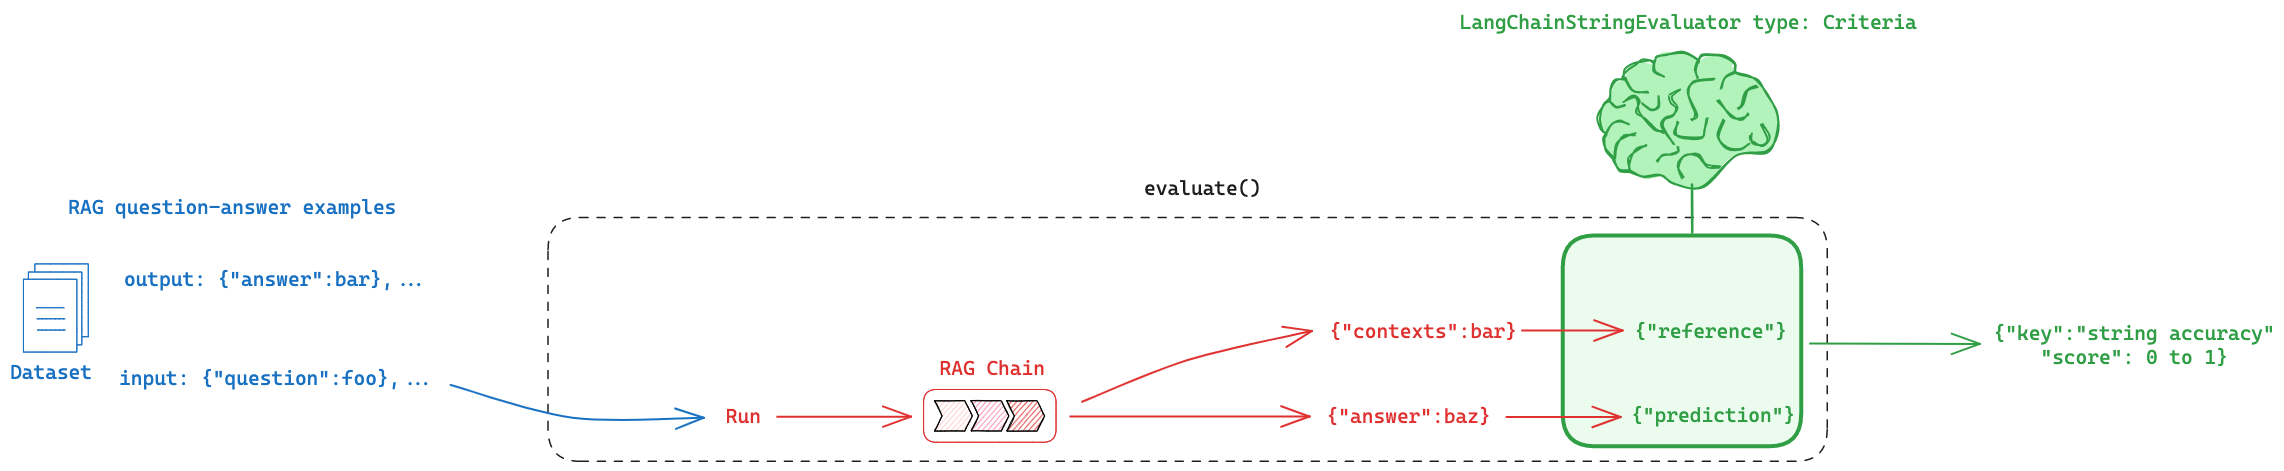

In [119]:
answer_hallucination_evaluator = LangChainStringEvaluator(
    "labeled_score_string",
    config={
        "criteria": {
            "accuracy": """Is the Assistant's Answer grounded in the Ground Truth documentation? A score of [[1]] means that the
            Assistant answer contains is not at all based upon / grounded in the Groun Truth documentation. A score of [[5]] means 
            that the Assistant answer contains some information (e.g., a hallucination) that is not captured in the Ground Truth 
            documentation. A score of [[10]] means that the Assistant answer is fully based upon the in the Ground Truth documentation."""
        },
        # If you want the score to be saved on a scale from 0 to 1
        "normalize_by": 10,
    },
    prepare_data=lambda run, example: {
        "prediction": run.outputs["answer"],
        "reference": run.outputs["contexts"],
        "input": example.inputs["question"],
    },
)

In [121]:
#https://smith.langchain.com/o/ede99342-7903-58f3-b9a6-8a33f50f4dcc/datasets/49aae5d4-0f7f-4702-b4c0-dff2cb04a41f/compare?selectedSessions=5e1dabff-75b7-42cf-8ed0-2ddf76ad6007
dataset_name = "Job_Posting_Tests"
experiment_results = evaluate(
    predict_rag_answer_with_context,
    data=dataset_name,
    evaluators=[answer_hallucination_evaluator],
    experiment_prefix="rag-qa-oai-hallucination",
    # Any experiment metadata can be specified here
    metadata={
        "variant": "LCEL context, gpt-4o",
    },
)

SyntaxError: invalid decimal literal (1170927664.py, line 2)

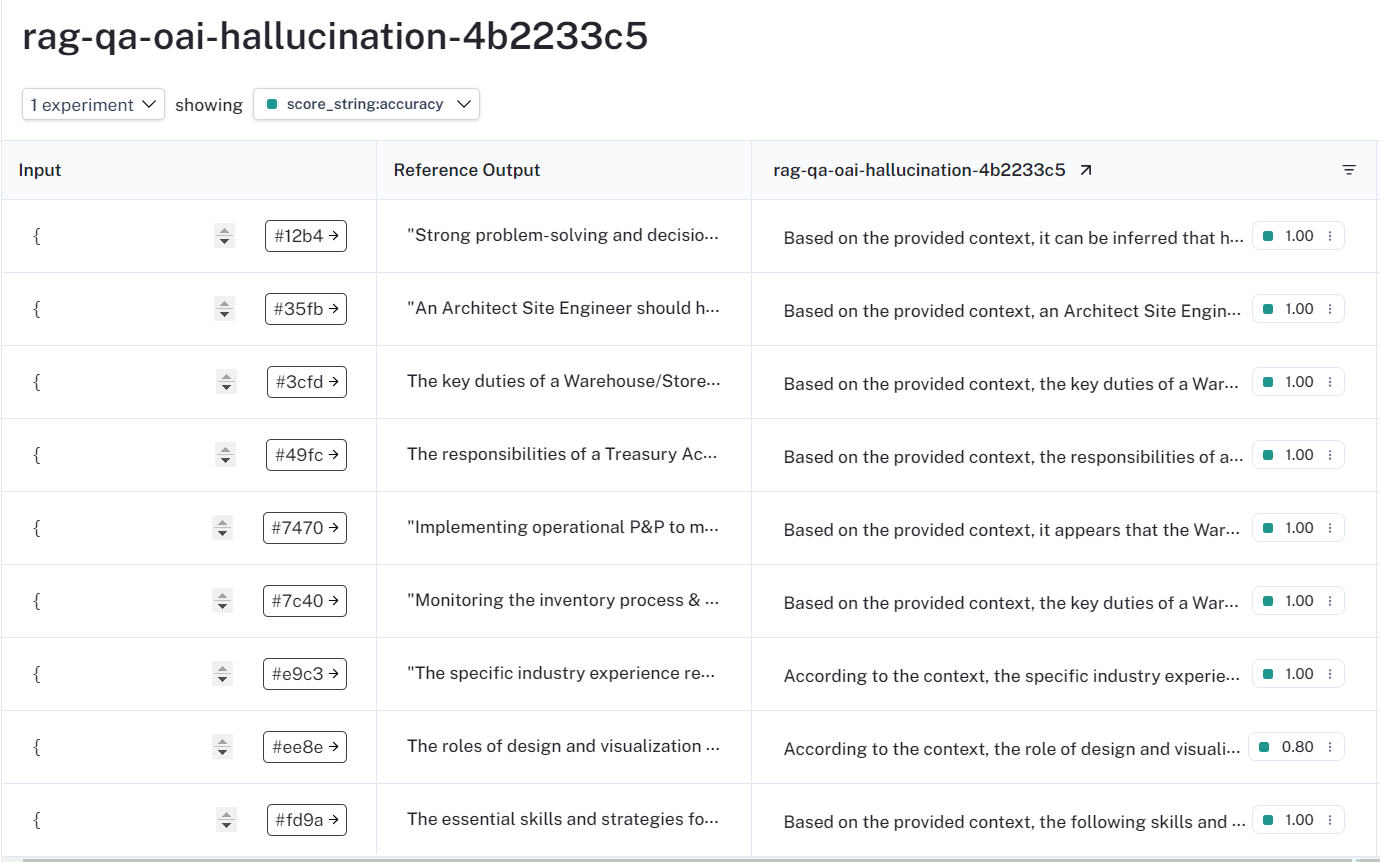

## RAG Evaluators
## Type 3: Document Relevance to Question
compare our RAG chain document retrieval to the question
![](https://docs.smith.langchain.com/assets/images/langsmith_rag_flow_doc_relevance-dc40a2e76504090820e0fe89c240f6d3.png)

In [117]:
from langsmith.evaluation import LangChainStringEvaluator, evaluate
import textwrap

docs_relevance_evaluator = LangChainStringEvaluator(
    "score_string",
    config={
        "criteria": {
            "document_relevance": textwrap.dedent(
                """The response is a set of documents retrieved from a vectorstore. The input is a question
            used for retrieval. You will score whether the Assistant's response (retrieved docs) is relevant to the Ground Truth 
            question. A score of [[1]] means that none of the  Assistant's response documents contain information useful in answering or addressing the user's input.
            A score of [[5]] means that the Assistant answer contains some relevant documents that can at least partially answer the user's question or input. 
            A score of [[10]] means that the user input can be fully answered using the content in the first retrieved doc(s)."""
            )
        },
        # If you want the score to be saved on a scale from 0 to 1
        "normalize_by": 10,
    },
    prepare_data=lambda run, example: {
        "prediction": run.outputs["contexts"],
        "input": example.inputs["question"],
    },
)

In [ ]:
#https://smith.langchain.com/o/ede99342-7903-58f3-b9a6-8a33f50f4dcc/datasets/49aae5d4-0f7f-4702-b4c0-dff2cb04a41f/compare?selectedSessions=e0606544-755a-42f5-8215-e12e8619f525&baseline=undefined&activeSession=e0606544-755a-42f5-8215-e12e8619f525
dataset_name = "Job_Posting_Tests"
experiment_results = evaluate(
    predict_rag_answer_with_context,
    data=dataset_name,
    evaluators=[docs_relevance_evaluator],
    experiment_prefix="rag-qa-oai-doc-relevance",
    # Any experiment metadata can be specified here
    metadata={
        "variant": "LCEL context, gpt-3.5-turbo",
    },
)



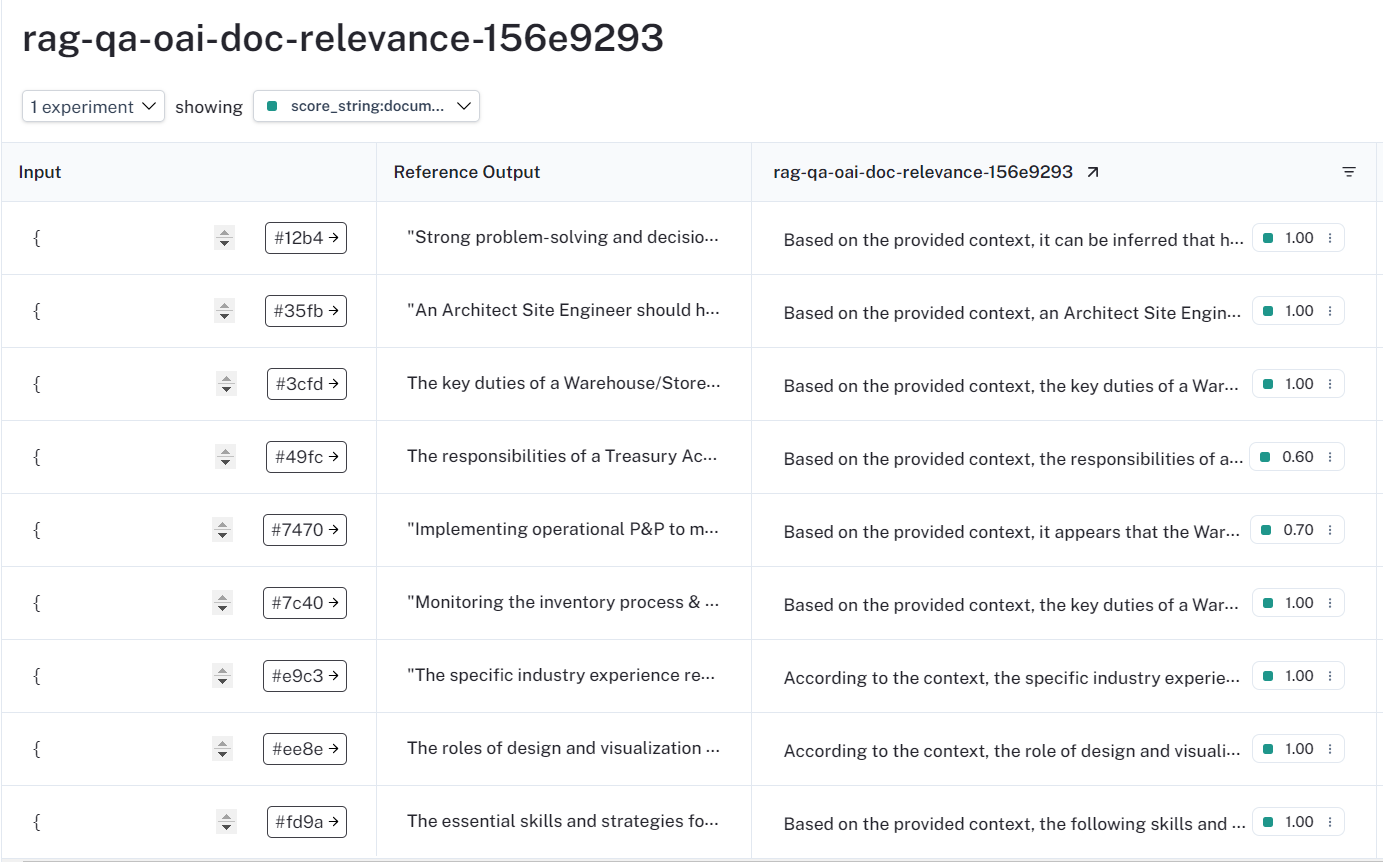

# Conclusion LLama3 with HyDE showed most accurate RAG System on Test Data

In [122]:
question = "Senior Machine Learning Engineer"

In [126]:
model = ChatOllama(model='llama3', temperature=0)

# RAG
template = """
    please provide the user with a personalized career advice to become {question}
    based on these retrieved documents job postings:
    {context}
    sound natural and generic do not include any of job poster details just utilize the context of what is needed
    DO NOT start with refering that you were looking into job poster rather than a domain expert
"""
retireved_docs=HyDE_retrieval_chain.invoke(question)

prompt = ChatPromptTemplate.from_template(template)

final_rag_chain = (
    prompt
    | model
    | StrOutputParser()
)



time=2024-07-09T01:54:06.619Z level=INFO source=memory.go:309 msg="offload to cuda" layers.requested=-1 layers.model=43 layers.offload=43 layers.split="" memory.available="[14.6 GiB]" memory.required.full="7.5 GiB" memory.required.partial="7.5 GiB" memory.required.kv="1.3 GiB" memory.required.allocations="[7.5 GiB]" memory.weights.total="5.7 GiB" memory.weights.repeating="5.0 GiB" memory.weights.nonrepeating="717.8 MiB" memory.graph.full="507.0 MiB" memory.graph.partial="1.2 GiB"
time=2024-07-09T01:54:06.620Z level=INFO source=server.go:368 msg="starting llama server" cmd="/tmp/ollama3742789039/runners/cuda_v11/ollama_llama_server --model /root/.ollama/models/blobs/sha256-0da0a4d67fe4ce317f63a6fcefa9152a2c5e035700ea3db79b3893dc2e7da2b0 --ctx-size 4096 --batch-size 512 --embedding --log-disable --n-gpu-layers 43 --parallel 1 --port 39597"
time=2024-07-09T01:54:06.620Z level=INFO source=sched.go:382 msg="loaded runners" count=1
time=2024-07-09T01:54:06.620Z level=INFO source=server.go:55

INFO [main] build info | build=1 commit="7c26775" tid="132723728588800" timestamp=1720490046
INFO [main] system info | n_threads=2 n_threads_batch=-1 system_info="AVX = 1 | AVX_VNNI = 0 | AVX2 = 0 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | AVX512_BF16 = 0 | FMA = 0 | NEON = 0 | SVE = 0 | ARM_FMA = 0 | F16C = 0 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | MATMUL_INT8 = 0 | LLAMAFILE = 1 | " tid="132723728588800" timestamp=1720490046 total_threads=4
INFO [main] HTTP server listening | hostname="127.0.0.1" n_threads_http="3" port="39597" tid="132723728588800" timestamp=1720490046


time=2024-07-09T01:54:06.872Z level=INFO source=server.go:594 msg="waiting for server to become available" status="llm server loading model"
llama_model_loader: - kv  26:                      tokenizer.ggml.scores arr[f32,256000]  = [0.000000, 0.000000, 0.000000, 0.0000...
llama_model_loader: - kv  27:             tokenizer.ggml.suffix_token_id u32              = 69
llama_model_loader: - kv  28:                  tokenizer.ggml.token_type arr[i32,256000]  = [3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...
llama_model_loader: - kv  29:                      tokenizer.ggml.tokens arr[str,256000]  = ["<pad>", "<eos>", "<bos>", "<unk>", ...
llama_model_loader: - kv  30:            tokenizer.ggml.unknown_token_id u32              = 3
llama_model_loader: - type  f32:  169 tensors
llama_model_loader: - type q4_0:  294 tensors
llama_model_loader: - type q6_K:    1 tensors
llm_load_vocab: special tokens cache size = 262
llm_load_vocab: token to piece cache size = 1.6014 MB
llm_load_print_meta: format    

INFO [main] model loaded | tid="132723728588800" timestamp=1720490050
INFO [update_slots] model does not support sliding window, limiting generation | n_ctx=4096 n_predict=4056 n_prompt_tokens=40 tid="132723728588800" timestamp=1720490050


time=2024-07-09T01:54:10.137Z level=INFO source=server.go:599 msg="llama runner started in 3.52 seconds"


[GIN] 2024/07/09 - 01:54:26 | 200 | 20.974079589s |       127.0.0.1 | POST     "/api/chat"


In [127]:
print(final_rag_chain.invoke({"context":retireved_docs,"question":question}))



[GIN] 2024/07/09 - 01:54:45 | 200 | 18.896537369s |       127.0.0.1 | POST     "/api/chat"
Based on your interests and skills, I'd like to offer some personalized career advice to help you become a Senior Machine Learning Engineer.

To excel in this role, it's essential to develop a strong foundation in machine learning concepts, algorithms, and frameworks. Here are some key areas to focus on:

1. **Deepen your understanding of machine learning fundamentals**: Focus on developing a solid grasp of statistical modeling, linear algebra, and calculus. This will help you build a strong foundation for more advanced topics.
2. **Stay up-to-date with the latest advancements in AI & ML**: Continuously update your knowledge on emerging trends, frameworks, and tools in the field. This will enable you to stay ahead of the curve and make informed decisions about which technologies to adopt.
3. **Develop expertise in a specific area of machine learning**: Consider specializing in areas like computer

In [128]:
pretty_print_docs(retireved_docs)

Document 1:

job_title: AI & ML Engineer
description: Job Description: AI & ML EngineerResponsibilities:Develop and implement AI & ML algorithms and models to solve complex business problems and improve efficiency.Design and build AI & ML systems for data processing, data storage, and data visualization.Collaborate with cross-functional teams to integrate AI & ML solutions into existing systems and processes.Conduct research and stay updated on the latest trends and advancements in AI & ML technology.Perform data cleansing, preprocessing, and feature engineering to prepare data for AI & ML modeling.Validate and optimize AI & ML models to ensure accuracy, efficiency, and scalability.Document development processes, results, and recommendations for future improvements.Requirements:Bachelor's or Master's degree in Computer Science, Mathematics, Data Science, or related field.Minimum of 3 years of experience in AI & ML development, preferably in a business setting.Proficient in programming 